# Facebook Posts Analysis
## Project McNulty
### Maragatham K N

### Objective : To predict if a post by a Brand made on their Facebook Page will go viral or not. The target of going viral is being decided by the number of likes, number of comments and number of shares on a particular post. The other features which might have a role are the day , hour of the post being posted, the Company , the brand and the type of the post.

#### Data has been collected using Facebook Graph API and stored in the POSTGRE server in AWS instance and being accessed in the Notebook using sqlalchemy.
#### The Data is being stored in two tables, post_details and comments_summary.

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import datetime
import time
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from datetime import timedelta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from sklearn.model_selection import train_test_split,KFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet,LogisticRegression #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,Normalizer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as stats
from sklearn import metrics
import sklearn as sk
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix



%matplotlib inline
sns.set()



/Users/maragatham/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/maragatham/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from textblob import TextBlob
from sklearn import cross_validation
from sklearn import svm
import imblearn.over_sampling

In [3]:
import pylab as pl
from sklearn.decomposition import PCA

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.metrics import classification_report

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [7]:
from sklearn.model_selection import KFold

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
from  sklearn.model_selection import StratifiedKFold

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import numpy as np

## Store data from post_details table to a dataframe

In [15]:
cnx = create_engine('postgresql://postgres@13.57.59.122:5432/db_mkn')
post_det_complete=pd.read_sql_query('SELECT * FROM post_details',cnx)

In [17]:
post_det_complete.drop('unnamed',axis=1,inplace=True)

In [16]:
post_det_complete.head()

,unnamed,brand,company,comments_0created_time,comments_0fromid,comments_0name,comments_0id,comments_0message,comments_1created_time,comments_1fromid,...,next,can_like,has_liked,total_likes,link,message,name,permalink_url,shares_count,type
0,0,Aquarius,Coca Cola,None,None,None,None,None,None,None,...,None,False,False,9.0,https://sprcdn-assets.sprinklr.com/800/12_aqua...,Somos de emojis y también de #PerfectServe #No...,sprcdn-assets.sprinklr.com,https://www.facebook.com/aquariusesp/posts/144...,1.0,link
1,1,Aquarius,Coca Cola,None,None,None,None,None,None,None,...,None,False,False,13.0,http://www.somosdeaquarius.es/,Hemos cambiado de imagen pero no de corazón.\n...,"Aquarius, el refresco de los que #NosMorimosPo...",https://www.facebook.com/aquariusesp/posts/144...,None,link
2,2,Aquarius,Coca Cola,None,None,None,None,None,None,None,...,None,False,False,22.0,https://www.facebook.com/aquariusesp/photos/a....,#Posjuicios en una sola imagen\n\n#NosMorimosP...,Timeline Photos,https://www.facebook.com/aquariusesp/posts/144...,None,photo
3,3,Aquarius,Coca Cola,None,None,None,None,None,None,None,...,None,False,False,8.0,https://www.facebook.com/aquariusesp/videos/14...,Únete a la fiesta de los posjuiciosos #Posjuic...,None,https://www.facebook.com/aquariusesp/videos/14...,2.0,video
4,4,Aquarius,Coca Cola,2017-07-12T15:48:28+0000,None,None,1437927859601111_1442657939128103,¿De quién es el tema del spot?,2017-07-14T23:33:40+0000,None,...,None,False,False,14.0,http://bit.ly/SpotAquariusPosjuicios,Ojalá tengas un verano lleno de #posjuicios\nh...,Aquarius - Convierte tus prejuicios en posjuicios,https://www.facebook.com/aquariusesp/posts/143...,23.0,video


In [18]:
post_det_complete.count()

brand                      17518
company                    17509
comments_0created_time     13322
comments_0fromid             554
comments_0name               554
comments_0id               13330
comments_0message          13155
comments_1created_time     11681
comments_1fromid             474
comments_1name               474
comments_1id               11687
comments_1message          11535
comments_10created_time     6473
comments_10fromid            120
comments_10name              120
comments_10id               6479
comments_10message          6392
comments_11created_time     6243
comments_11fromid             96
comments_11name               95
comments_11id               6248
comments_11message          6171
comments_12created_time     5998
comments_12fromid            110
comments_12name              110
comments_12id               6002
comments_12message          5918
comments_13created_time     5784
comments_13fromid             78
comments_13name               77
          

## Create a dataframe for Comments based on the post_det_complete dataFrame

In [19]:
comments=pd.DataFrame()
for num in range(0,25):
    if num == 20:
        df=pd.DataFrame(post_det_complete[['comments_9000reated_time',
                           'comments_9000d',
                           'comments_9000essage',
                           'id'
                           
                          ]])
    else:
    #print(num)
        df=pd.DataFrame(post_det_complete[['comments_'+str(num)+'created_time',
                           'comments_'+str(num)+'id',
                           'comments_'+str(num)+'message',
                           'id'
                           
                          ]])
    df.columns=['created_time','id','message','post_id']
    
    comments=comments.append(df)

In [20]:
comments.count()

created_time    169766
id              169852
message         167633
post_id         437575
dtype: int64

## Dropping all the null values from Comments dataframe

In [21]:
comments.dropna(inplace=True)

In [22]:
comments.count()

created_time    167540
id              167540
message         167540
post_id         167540
dtype: int64

In [23]:
comments.head()

,created_time,id,message,post_id
4,2017-07-12T15:48:28+0000,1437927859601111_1442657939128103,¿De quién es el tema del spot?,370295393031035_1437927859601111
5,2017-07-06T14:43:08+0000,1436905359703361_1436926029701294,Enhorabuena,370295393031035_1436905359703361
6,2017-07-03T14:34:31+0000,1434037003323530_1434040246656539,El de limon me encanta me gustaria que sacarai...,370295393031035_1434037003323530
12,2017-06-01T14:02:09+0000,1399995906727640_1402515816475649,Anas Ubadah,370295393031035_1399995906727640
13,2017-06-27T16:57:44+0000,1426526750741222_1427598230634074,¡Fresquito siempre es mejor!,370295393031035_1426526750741222


In [24]:
comments.rename(columns={'id':'comment_id'},inplace=True)

In [25]:
comments.head()

,created_time,comment_id,message,post_id
4,2017-07-12T15:48:28+0000,1437927859601111_1442657939128103,¿De quién es el tema del spot?,370295393031035_1437927859601111
5,2017-07-06T14:43:08+0000,1436905359703361_1436926029701294,Enhorabuena,370295393031035_1436905359703361
6,2017-07-03T14:34:31+0000,1434037003323530_1434040246656539,El de limon me encanta me gustaria que sacarai...,370295393031035_1434037003323530
12,2017-06-01T14:02:09+0000,1399995906727640_1402515816475649,Anas Ubadah,370295393031035_1399995906727640
13,2017-06-27T16:57:44+0000,1426526750741222_1427598230634074,¡Fresquito siempre es mejor!,370295393031035_1426526750741222


In [26]:
len(comments.post_id.unique())

13248

In [27]:
post_det_complete.rename(columns={'id':'post_id'},inplace=True)

In [28]:
post_det_complete.count()

brand                      17518
company                    17509
comments_0created_time     13322
comments_0fromid             554
comments_0name               554
comments_0id               13330
comments_0message          13155
comments_1created_time     11681
comments_1fromid             474
comments_1name               474
comments_1id               11687
comments_1message          11535
comments_10created_time     6473
comments_10fromid            120
comments_10name              120
comments_10id               6479
comments_10message          6392
comments_11created_time     6243
comments_11fromid             96
comments_11name               95
comments_11id               6248
comments_11message          6171
comments_12created_time     5998
comments_12fromid            110
comments_12name              110
comments_12id               6002
comments_12message          5918
comments_13created_time     5784
comments_13fromid             78
comments_13name               77
          

In [29]:
comments.count()

created_time    167540
comment_id      167540
message         167540
post_id         167540
dtype: int64

In [30]:
post_det_complete.post_id.isnull().value_counts()

False    17503
True        46
Name: post_id, dtype: int64

## Removing all the records with null post id

In [31]:
post_det_complete=post_det_complete[post_det_complete.post_id.notnull()]

In [32]:
post_det_complete[post_det_complete['post_id'].isnull()][['brand','company','post_id','created_time']]

,brand,company,post_id,created_time


## Merging Post_det_complete with Comments to get all the comments for every post

In [33]:
posts_with_commnts=post_det_complete[['created_time','post_id','message','company','brand','type','name']].\
merge(comments[['post_id','created_time','comment_id','message']]\
                             ,on='post_id',how='left')

In [34]:
posts_with_commnts.count()

created_time_x    172205
post_id           172205
message_x         164022
company           172203
brand             172205
type              172203
name              133006
created_time_y    167962
comment_id        167962
message_y         167962
dtype: int64

In [35]:
posts_with_commnts.head()

,created_time_x,post_id,message_x,company,brand,type,name,created_time_y,comment_id,message_y
0,2017-07-17T11:55:31+0000,370295393031035_1447326451994585,Somos de emojis y también de #PerfectServe #No...,Coca Cola,Aquarius,link,sprcdn-assets.sprinklr.com,NaN,NaN,NaN
1,2017-07-14T11:34:03+0000,370295393031035_1444355978958299,Hemos cambiado de imagen pero no de corazón.\n...,Coca Cola,Aquarius,link,"Aquarius, el refresco de los que #NosMorimosPo...",NaN,NaN,NaN
2,2017-07-12T18:08:00+0000,370295393031035_1442761935784370,#Posjuicios en una sola imagen\n\n#NosMorimosP...,Coca Cola,Aquarius,photo,Timeline Photos,NaN,NaN,NaN
3,2017-07-10T17:35:02+0000,370295393031035_1440942275966336,Únete a la fiesta de los posjuiciosos #Posjuic...,Coca Cola,Aquarius,video,None,NaN,NaN,NaN
4,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-07-12T15:48:28+0000,1437927859601111_1442657939128103,¿De quién es el tema del spot?


In [36]:
posts_with_commnts.rename(columns={'created_time_x':'post_created_time','message_x':'post_message',\
                                   'created_time_y':'comment_created_time','message_y':'comment_message'},inplace=True)

In [37]:
posts_with_commnts.head()

,post_created_time,post_id,post_message,company,brand,type,name,comment_created_time,comment_id,comment_message
0,2017-07-17T11:55:31+0000,370295393031035_1447326451994585,Somos de emojis y también de #PerfectServe #No...,Coca Cola,Aquarius,link,sprcdn-assets.sprinklr.com,NaN,NaN,NaN
1,2017-07-14T11:34:03+0000,370295393031035_1444355978958299,Hemos cambiado de imagen pero no de corazón.\n...,Coca Cola,Aquarius,link,"Aquarius, el refresco de los que #NosMorimosPo...",NaN,NaN,NaN
2,2017-07-12T18:08:00+0000,370295393031035_1442761935784370,#Posjuicios en una sola imagen\n\n#NosMorimosP...,Coca Cola,Aquarius,photo,Timeline Photos,NaN,NaN,NaN
3,2017-07-10T17:35:02+0000,370295393031035_1440942275966336,Únete a la fiesta de los posjuiciosos #Posjuic...,Coca Cola,Aquarius,video,None,NaN,NaN,NaN
4,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-07-12T15:48:28+0000,1437927859601111_1442657939128103,¿De quién es el tema del spot?


## Combine with Comments Summary to get the summary on comments etc for every post

In [38]:
comments_summary= pd.read_sql_query('SELECT * FROM comments_summary_tab',cnx)

In [39]:
comments_summary.head()

,can_comment,rank_order,total_comments,post_id,can_like,has_liked,total_likes,total_reactions,viewer_reaction,shares_count
0,FALSE,ranked,26,23550666633_10155052978511634,FALSE,FALSE,53,62,NONE,22.0
1,FALSE,ranked,0,97974642277_10154778532307278,FALSE,FALSE,23,24,NONE,NaN
2,FALSE,ranked,0,97974642277_10154770611762278,FALSE,FALSE,17,17,NONE,NaN
3,FALSE,ranked,0,97974642277_10154755114897278,FALSE,FALSE,19,19,NONE,NaN
4,FALSE,ranked,0,97974642277_10154751665567278,FALSE,FALSE,11,11,NONE,1.0


In [40]:
posts_commnts_summ=posts_with_commnts.merge(comments_summary\
                                                         ,on='post_id',how='left')

In [41]:
posts_commnts_summ.count()

post_created_time       173281
post_id                 173281
post_message            164914
company                 173279
brand                   173281
type                    173279
name                    134040
comment_created_time    169038
comment_id              169038
comment_message         169038
can_comment             172188
rank_order              172188
total_comments          172188
can_like                172188
has_liked               172188
total_likes             172188
total_reactions         172188
viewer_reaction         172188
shares_count            130698
dtype: int64

In [42]:
posts_commnts_summ.head()

,post_created_time,post_id,post_message,company,brand,type,name,comment_created_time,comment_id,comment_message,can_comment,rank_order,total_comments,can_like,has_liked,total_likes,total_reactions,viewer_reaction,shares_count
0,2017-07-17T11:55:31+0000,370295393031035_1447326451994585,Somos de emojis y también de #PerfectServe #No...,Coca Cola,Aquarius,link,sprcdn-assets.sprinklr.com,NaN,NaN,NaN,FALSE,ranked,0.0,FALSE,FALSE,9.0,10.0,NONE,1.0
1,2017-07-14T11:34:03+0000,370295393031035_1444355978958299,Hemos cambiado de imagen pero no de corazón.\n...,Coca Cola,Aquarius,link,"Aquarius, el refresco de los que #NosMorimosPo...",NaN,NaN,NaN,FALSE,ranked,0.0,FALSE,FALSE,13.0,15.0,NONE,NaN
2,2017-07-12T18:08:00+0000,370295393031035_1442761935784370,#Posjuicios en una sola imagen\n\n#NosMorimosP...,Coca Cola,Aquarius,photo,Timeline Photos,NaN,NaN,NaN,FALSE,ranked,1.0,FALSE,FALSE,22.0,26.0,NONE,NaN
3,2017-07-10T17:35:02+0000,370295393031035_1440942275966336,Únete a la fiesta de los posjuiciosos #Posjuic...,Coca Cola,Aquarius,video,None,NaN,NaN,NaN,FALSE,ranked,1.0,FALSE,FALSE,8.0,10.0,NONE,2.0
4,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-07-12T15:48:28+0000,1437927859601111_1442657939128103,¿De quién es el tema del spot?,FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0


In [43]:
posts_commnts_summ.count()

post_created_time       173281
post_id                 173281
post_message            164914
company                 173279
brand                   173281
type                    173279
name                    134040
comment_created_time    169038
comment_id              169038
comment_message         169038
can_comment             172188
rank_order              172188
total_comments          172188
can_like                172188
has_liked               172188
total_likes             172188
total_reactions         172188
viewer_reaction         172188
shares_count            130698
dtype: int64

In [44]:
posts_commnts_summ[posts_commnts_summ.post_id=='370295393031035_1437927859601111']

,post_created_time,post_id,post_message,company,brand,type,name,comment_created_time,comment_id,comment_message,can_comment,rank_order,total_comments,can_like,has_liked,total_likes,total_reactions,viewer_reaction,shares_count
4,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-07-12T15:48:28+0000,1437927859601111_1442657939128103,¿De quién es el tema del spot?,FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0
5,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-07-14T23:33:40+0000,1437927859601111_1444856762241554,No puedo esperar,FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0
6,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-10-02T09:09:15+0000,1437927859601111_1517832734943956,¿Dónde está grabado el spot?,FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0
7,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-07-13T20:54:06+0000,1437927859601111_1443779495682614,Me encanta !!! Como todos lo de Aquarius ! Y q...,FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0
8,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-08-03T11:42:17+0000,1437927859601111_1463617217032175,"¡A mí me encanta! Es más, es de lo que bebo en...",FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0
9,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-07-14T23:32:30+0000,1437927859601111_1444855948908302,Quiero saber de quién y cómo se titula el tema...,FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0
10,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-09-02T07:11:42+0000,1437927859601111_1491060734287823,Carmen Romero del Castillo tu prejuicio en mis...,FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0
11,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-07-07T23:04:21+0000,1437927859601111_1438256656234898,Me encanta. Quiero el d cola,FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0


## Calculating Response time to Comment after a post has been created

In [45]:
posts_commnts_summ['Response_Time']=pd.to_datetime(posts_commnts_summ\
                                                    ['comment_created_time'],errors='coerce')-pd.to_datetime(posts_commnts_summ['post_created_time'],errors='coerce')


In [46]:
posts_commnts_summ.Response_Time=posts_commnts_summ.Response_Time.astype('timedelta64[s]')

In [47]:
posts_commnts_summ.head()

,post_created_time,post_id,post_message,company,brand,type,name,comment_created_time,comment_id,comment_message,can_comment,rank_order,total_comments,can_like,has_liked,total_likes,total_reactions,viewer_reaction,shares_count,Response_Time
0,2017-07-17T11:55:31+0000,370295393031035_1447326451994585,Somos de emojis y también de #PerfectServe #No...,Coca Cola,Aquarius,link,sprcdn-assets.sprinklr.com,NaN,NaN,NaN,FALSE,ranked,0.0,FALSE,FALSE,9.0,10.0,NONE,1.0,NaN
1,2017-07-14T11:34:03+0000,370295393031035_1444355978958299,Hemos cambiado de imagen pero no de corazón.\n...,Coca Cola,Aquarius,link,"Aquarius, el refresco de los que #NosMorimosPo...",NaN,NaN,NaN,FALSE,ranked,0.0,FALSE,FALSE,13.0,15.0,NONE,NaN,NaN
2,2017-07-12T18:08:00+0000,370295393031035_1442761935784370,#Posjuicios en una sola imagen\n\n#NosMorimosP...,Coca Cola,Aquarius,photo,Timeline Photos,NaN,NaN,NaN,FALSE,ranked,1.0,FALSE,FALSE,22.0,26.0,NONE,NaN,NaN
3,2017-07-10T17:35:02+0000,370295393031035_1440942275966336,Únete a la fiesta de los posjuiciosos #Posjuic...,Coca Cola,Aquarius,video,None,NaN,NaN,NaN,FALSE,ranked,1.0,FALSE,FALSE,8.0,10.0,NONE,2.0,NaN
4,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-07-12T15:48:28+0000,1437927859601111_1442657939128103,¿De quién es el tema del spot?,FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0,431741.0


## To make Response Time huge where no comments are available.

In [48]:
posts_commnts_summ.Response_Time.fillna(99999999999999,inplace=True)

## Take Day of the week as a feature

In [49]:
posts_commnts_summ["weekday"] = pd.to_datetime(posts_commnts_summ["post_created_time"],errors='coerce').dt.weekday_name

In [50]:
posts_commnts_summ['weekday'] = [0 if day == 'Saturday' \
                            or day == 'Sunday' else 1 for day in posts_commnts_summ['weekday']]

In [51]:
posts_commnts_summ.head()

,post_created_time,post_id,post_message,company,brand,type,name,comment_created_time,comment_id,comment_message,...,rank_order,total_comments,can_like,has_liked,total_likes,total_reactions,viewer_reaction,shares_count,Response_Time,weekday
0,2017-07-17T11:55:31+0000,370295393031035_1447326451994585,Somos de emojis y también de #PerfectServe #No...,Coca Cola,Aquarius,link,sprcdn-assets.sprinklr.com,NaN,NaN,NaN,...,ranked,0.0,FALSE,FALSE,9.0,10.0,NONE,1.0,1.000000e+14,1
1,2017-07-14T11:34:03+0000,370295393031035_1444355978958299,Hemos cambiado de imagen pero no de corazón.\n...,Coca Cola,Aquarius,link,"Aquarius, el refresco de los que #NosMorimosPo...",NaN,NaN,NaN,...,ranked,0.0,FALSE,FALSE,13.0,15.0,NONE,NaN,1.000000e+14,1
2,2017-07-12T18:08:00+0000,370295393031035_1442761935784370,#Posjuicios en una sola imagen\n\n#NosMorimosP...,Coca Cola,Aquarius,photo,Timeline Photos,NaN,NaN,NaN,...,ranked,1.0,FALSE,FALSE,22.0,26.0,NONE,NaN,1.000000e+14,1
3,2017-07-10T17:35:02+0000,370295393031035_1440942275966336,Únete a la fiesta de los posjuiciosos #Posjuic...,Coca Cola,Aquarius,video,None,NaN,NaN,NaN,...,ranked,1.0,FALSE,FALSE,8.0,10.0,NONE,2.0,1.000000e+14,1
4,2017-07-07T15:52:47+0000,370295393031035_1437927859601111,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,2017-07-12T15:48:28+0000,1437927859601111_1442657939128103,¿De quién es el tema del spot?,...,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0,4.317410e+05,1


In [52]:
posts_commnts_summ.count()

post_created_time       173281
post_id                 173281
post_message            164914
company                 173279
brand                   173281
type                    173279
name                    134040
comment_created_time    169038
comment_id              169038
comment_message         169038
can_comment             172188
rank_order              172188
total_comments          172188
can_like                172188
has_liked               172188
total_likes             172188
total_reactions         172188
viewer_reaction         172188
shares_count            130698
Response_Time           173281
weekday                 173281
dtype: int64

In [53]:
posts_commnts_summ.columns

Index(['post_created_time', 'post_id', 'post_message', 'company', 'brand',
       'type', 'name', 'comment_created_time', 'comment_id', 'comment_message',
       'can_comment', 'rank_order', 'total_comments', 'can_like', 'has_liked',
       'total_likes', 'total_reactions', 'viewer_reaction', 'shares_count',
       'Response_Time', 'weekday'],
      dtype='object')

In [54]:
posts_commnts_summ.dropna().count()

post_created_time       104858
post_id                 104858
post_message            104858
company                 104858
brand                   104858
type                    104858
name                    104858
comment_created_time    104858
comment_id              104858
comment_message         104858
can_comment             104858
rank_order              104858
total_comments          104858
can_like                104858
has_liked               104858
total_likes             104858
total_reactions         104858
viewer_reaction         104858
shares_count            104858
Response_Time           104858
weekday                 104858
dtype: int64

## Handle Null,0 NaN values for the various columns

In [55]:
posts_commnts_summ.comment_created_time.fillna(0,inplace=True)
posts_commnts_summ.comment_id.fillna(0,inplace=True)
posts_commnts_summ.comment_message.fillna('No Comments',inplace=True)
posts_commnts_summ.total_comments.fillna(0,inplace=True)
posts_commnts_summ.total_reactions.fillna(0,inplace=True)
posts_commnts_summ.shares_count.fillna(0,inplace=True)
posts_commnts_summ.name.fillna('No Name',inplace=True)
posts_commnts_summ.post_message.fillna('No Message',inplace=True)
posts_commnts_summ.viewer_reaction.fillna('NONE',inplace=True)
posts_commnts_summ.total_likes.fillna(0,inplace=True)
posts_commnts_summ.can_like.fillna(False,inplace=True)
posts_commnts_summ.has_liked.fillna(False,inplace=True)
posts_commnts_summ.can_comment.fillna(False,inplace=True)
posts_commnts_summ.rank_order.fillna('No Order',inplace=True)

## Group by dataframe to get the first comment to the post

In [56]:
posts_commnts_gp=posts_commnts_summ.groupby(['post_id','post_created_time', 'post_message', 'company', 'brand',
       'type', 'name', 
       'can_comment', 'rank_order', 'total_comments', 'can_like', 'has_liked',
       'total_likes', 'total_reactions', 'viewer_reaction', 'shares_count',
        'weekday'],as_index=False)['Response_Time'].min()

In [57]:
posts_commnts_gp[posts_commnts_gp.post_id=='370295393031035_1437927859601111']

,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,can_like,has_liked,total_likes,total_reactions,viewer_reaction,shares_count,weekday,Response_Time
10783,370295393031035_1437927859601111,2017-07-07T15:52:47+0000,Ojalá tengas un verano lleno de #posjuicios\nh...,Coca Cola,Aquarius,video,Aquarius - Convierte tus prejuicios en posjuicios,FALSE,ranked,8.0,FALSE,FALSE,14.0,19.0,NONE,23.0,1,25894.0


In [58]:
posts_commnts_gp.count()

post_id              17515
post_created_time    17515
post_message         17515
company              17515
brand                17515
type                 17515
name                 17515
can_comment          17515
rank_order           17515
total_comments       17515
can_like             17515
has_liked            17515
total_likes          17515
total_reactions      17515
viewer_reaction      17515
shares_count         17515
weekday              17515
Response_Time        17515
dtype: int64

In [59]:
posts_commnts_gp.head()

,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,can_like,has_liked,total_likes,total_reactions,viewer_reaction,shares_count,weekday,Response_Time
0,111652908860614_100385246688948,2010-08-18T06:52:00+0000,"sharing~ ""化妝保養品的故事"" - 給每一位關心自己愛美麗愛健康的妳\nhttp:/...",Coca Cola,Ilohas,video,The Story of Cosmetics (2010),FALSE,chronological,2.0,FALSE,FALSE,1.0,1.0,NONE,0.0,1,2.860000e+02
1,111652908860614_10202628859594679,2014-02-17T14:00:01+0000,[兼差人妻 in Tokyo] 前一陣子才去日本東北震災復興志工活動，回來就發現這個可愛的台...,Coca Cola,Ilohas,video,台灣頌之歌タイワンダー☆テーマソング,FALSE,ranked,0.0,FALSE,FALSE,14.0,14.0,NONE,0.0,1,1.000000e+14
2,111652908860614_10203107306712095,2014-01-09T14:23:39+0000,"有一個1/22(三)內湖社大社企研討會,主辦人是一位公益夥伴瓊齡,歡迎大家報名 : http...",Coca Cola,Ilohas,link,臺北市內湖社區大學 社會企業論壇2014-01-20 - BeClass 線上報名系統 On...,FALSE,ranked,0.0,FALSE,FALSE,5.0,5.0,NONE,0.0,1,1.000000e+14
3,111652908860614_10203294648028719,2014-03-18T12:30:00+0000,[社企流] 牛津博士上網賣菜 讓你輕鬆買到安心食材\n\n張駿極，一個已經邁入中年的科技業老...,Coca Cola,Ilohas,video,博士網路賣菜 - 張駿極,FALSE,ranked,1.0,FALSE,FALSE,15.0,15.0,NONE,0.0,1,1.690000e+02
4,111652908860614_10203294806992693,2014-03-25T12:30:00+0000,[社企流] 最飽足的餅乾，是最破碎的餅乾。\n\n在去年TEDxTaipei的演講中，「Te...,Coca Cola,Ilohas,video,擁抱世代從教育開始：劉安婷 (Anting Liu) at TEDxTaipei 2013,FALSE,ranked,0.0,FALSE,FALSE,16.0,16.0,NONE,3.0,1,1.000000e+14


## Plot to see the features and its relations

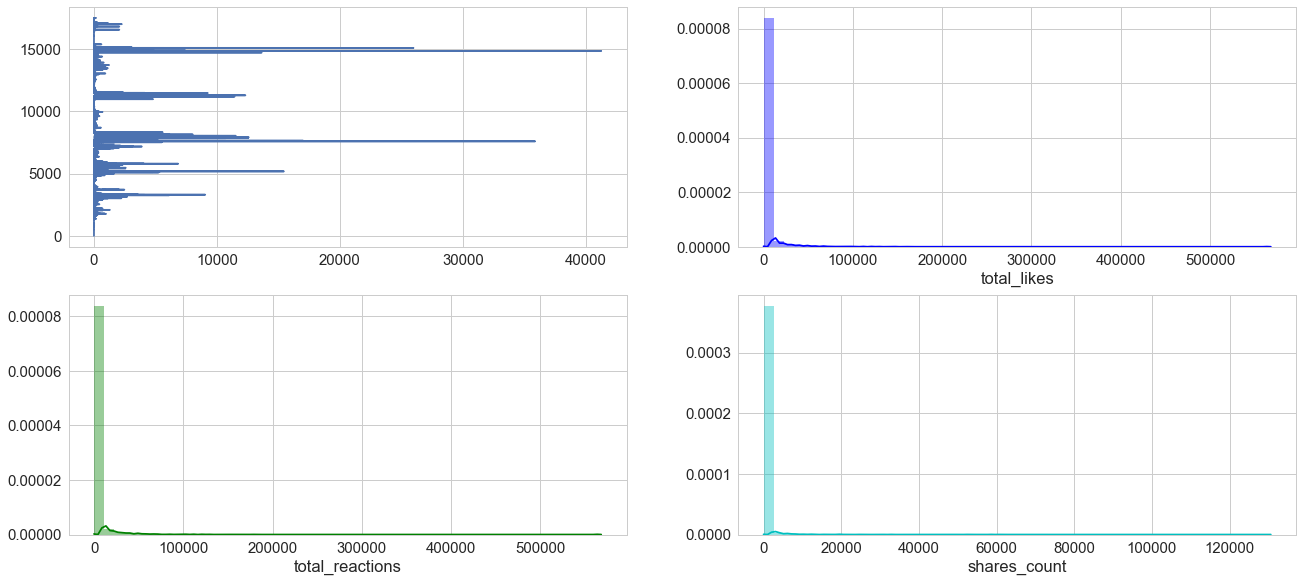

In [174]:
plt.figure(figsize=(22,15))
sns.set(style='whitegrid',font_scale=1.5)
plt.subplot(3,2,1)
plt.plot((posts_commnts_gp.total_comments),np.arange(len(posts_commnts_gp.total_comments)))
#plt.figtext(size='medium')
#sns.factorplot(posts_commnts_gp.total_comments)
#sns.distplot(posts_commnts_gp.total_comments,color='r',bins=10)
plt.subplot(3,2,2)
sns.distplot(posts_commnts_gp.total_likes,color='b')
plt.subplot(3,2,3)
sns.distplot(posts_commnts_gp.total_reactions,color='g')
plt.subplot(3,2,4)
sns.distplot(posts_commnts_gp.shares_count,color='c')

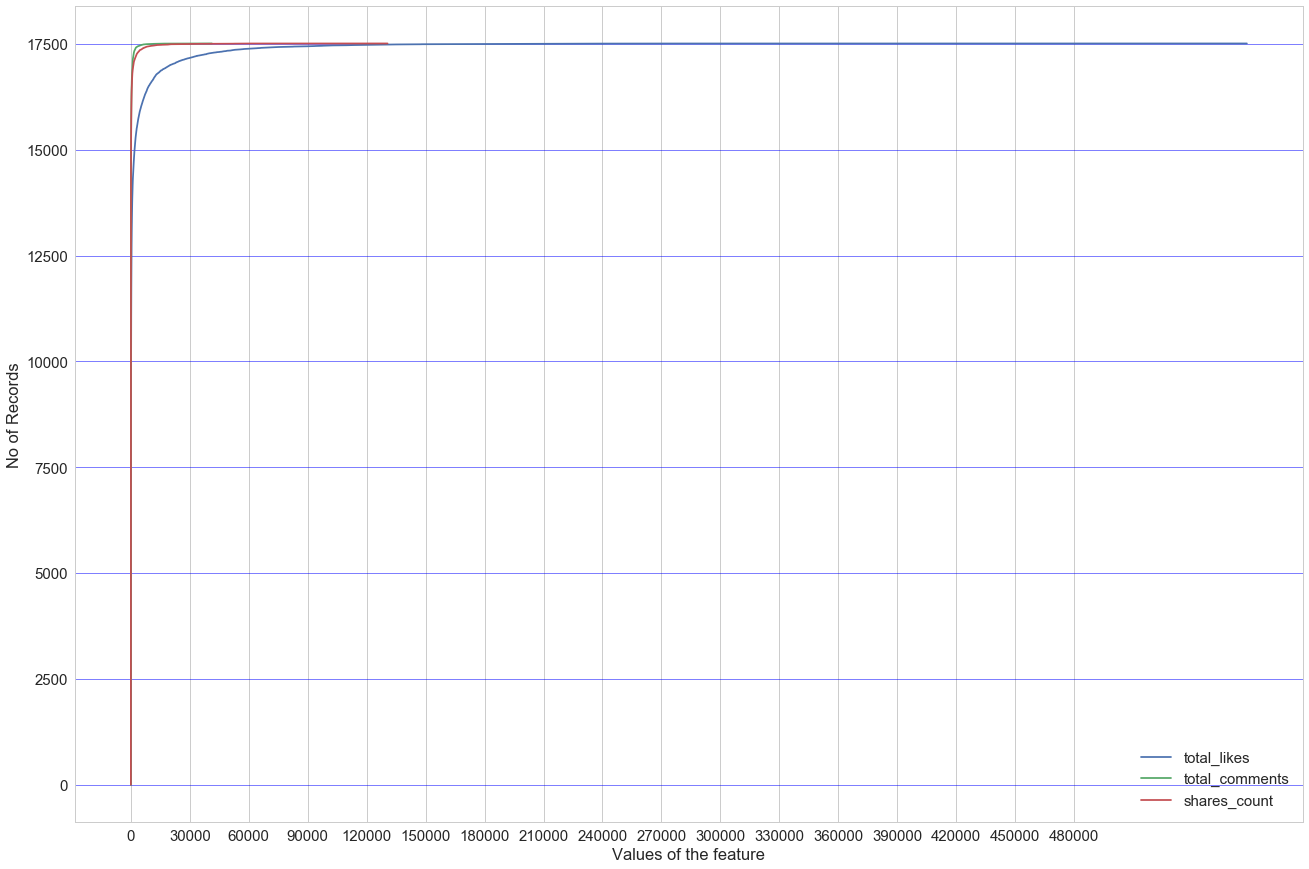

In [61]:
plt.figure(figsize=(22,15))
plt.plot(sorted(posts_commnts_gp['total_likes'],reverse=False),np.arange(0,len(posts_commnts_gp['total_likes'])))
plt.plot(sorted(posts_commnts_gp['total_comments'],reverse=False),np.arange(0,len(posts_commnts_gp['total_comments'])))
#plt.plot(np.arange(0,len(fb_gb_df['total_comments'])),sorted(np.(-(fb_gb_df.Response_Time_secs)),reverse=False))
plt.plot(sorted(posts_commnts_gp['shares_count'],reverse=False),np.arange(0,len(posts_commnts_gp['shares_count'])))
plt.grid(color='b', linestyle='-', linewidth=.5,axis='y')
plt.ticklabel_format(axis='y',style = 'plain')
plt.xticks(np.arange(0,500000,30000))
plt.ylabel('No of Records')
plt.xlabel('Values of the feature')
plt.legend(['total_likes','total_comments','shares_count'])



In [62]:
posts_commnts_gp[(posts_commnts_gp['total_likes']>40000)|(posts_commnts_gp.total_comments>600)|(posts_commnts_gp.shares_count>500)].count()

post_id              1331
post_created_time    1331
post_message         1331
company              1331
brand                1331
type                 1331
name                 1331
can_comment          1331
rank_order           1331
total_comments       1331
can_like             1331
has_liked            1331
total_likes          1331
total_reactions      1331
viewer_reaction      1331
shares_count         1331
weekday              1331
Response_Time        1331
dtype: int64

## Creating new columns for hour of the day

In [63]:
posts_commnts_gp['Hour']=pd.to_datetime(posts_commnts_gp.post_created_time).dt.hour

In [64]:
posts_commnts_gp.head()

,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,can_like,has_liked,total_likes,total_reactions,viewer_reaction,shares_count,weekday,Response_Time,Hour
0,111652908860614_100385246688948,2010-08-18T06:52:00+0000,"sharing~ ""化妝保養品的故事"" - 給每一位關心自己愛美麗愛健康的妳\nhttp:/...",Coca Cola,Ilohas,video,The Story of Cosmetics (2010),FALSE,chronological,2.0,FALSE,FALSE,1.0,1.0,NONE,0.0,1,2.860000e+02,6
1,111652908860614_10202628859594679,2014-02-17T14:00:01+0000,[兼差人妻 in Tokyo] 前一陣子才去日本東北震災復興志工活動，回來就發現這個可愛的台...,Coca Cola,Ilohas,video,台灣頌之歌タイワンダー☆テーマソング,FALSE,ranked,0.0,FALSE,FALSE,14.0,14.0,NONE,0.0,1,1.000000e+14,14
2,111652908860614_10203107306712095,2014-01-09T14:23:39+0000,"有一個1/22(三)內湖社大社企研討會,主辦人是一位公益夥伴瓊齡,歡迎大家報名 : http...",Coca Cola,Ilohas,link,臺北市內湖社區大學 社會企業論壇2014-01-20 - BeClass 線上報名系統 On...,FALSE,ranked,0.0,FALSE,FALSE,5.0,5.0,NONE,0.0,1,1.000000e+14,14
3,111652908860614_10203294648028719,2014-03-18T12:30:00+0000,[社企流] 牛津博士上網賣菜 讓你輕鬆買到安心食材\n\n張駿極，一個已經邁入中年的科技業老...,Coca Cola,Ilohas,video,博士網路賣菜 - 張駿極,FALSE,ranked,1.0,FALSE,FALSE,15.0,15.0,NONE,0.0,1,1.690000e+02,12
4,111652908860614_10203294806992693,2014-03-25T12:30:00+0000,[社企流] 最飽足的餅乾，是最破碎的餅乾。\n\n在去年TEDxTaipei的演講中，「Te...,Coca Cola,Ilohas,video,擁抱世代從教育開始：劉安婷 (Anting Liu) at TEDxTaipei 2013,FALSE,ranked,0.0,FALSE,FALSE,16.0,16.0,NONE,3.0,1,1.000000e+14,12


## Setting the Viral Target based on the total_likes, total_comments and shares_count

In [65]:
posts_commnts_gp['Viral']=0

In [66]:
posts_commnts_gp.ix[(posts_commnts_gp['total_likes']>40000)|\
                 (posts_commnts_gp.total_comments>600)|\
                 (posts_commnts_gp.shares_count>500),'Viral']=1

In [67]:
posts_commnts_gp.Viral.value_counts()

0    16184
1     1331
Name: Viral, dtype: int64

In [68]:
viral_dict={'Viral':1,'Not Viral':0}

In [69]:
posts_commnts_gp.head(2)

,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,can_like,has_liked,total_likes,total_reactions,viewer_reaction,shares_count,weekday,Response_Time,Hour,Viral
0,111652908860614_100385246688948,2010-08-18T06:52:00+0000,"sharing~ ""化妝保養品的故事"" - 給每一位關心自己愛美麗愛健康的妳\nhttp:/...",Coca Cola,Ilohas,video,The Story of Cosmetics (2010),FALSE,chronological,2.0,FALSE,FALSE,1.0,1.0,NONE,0.0,1,2.860000e+02,6,0
1,111652908860614_10202628859594679,2014-02-17T14:00:01+0000,[兼差人妻 in Tokyo] 前一陣子才去日本東北震災復興志工活動，回來就發現這個可愛的台...,Coca Cola,Ilohas,video,台灣頌之歌タイワンダー☆テーマソング,FALSE,ranked,0.0,FALSE,FALSE,14.0,14.0,NONE,0.0,1,1.000000e+14,14,0


In [70]:
posts_commnts_gp.Hour=posts_commnts_gp.Hour.astype(str)

In [71]:
target=posts_commnts_gp.Viral
features=posts_commnts_gp[['company','brand','type','weekday','rank_order','Hour']]

In [72]:
features=pd.get_dummies(features)

In [73]:
len(features.columns)

69

In [74]:
features.head()

,weekday,company_Coca Cola,company_Microsoft,company_Nike,company_P&G,company_Starbucks,brand_All,brand_Aquarius,brand_Ciel,brand_Coca Cola Life,...,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Defining a function for KNN model and plotting the scores of KNN CV

In [75]:
def cal_knn(X,y,title,scoring,k = 0):
    if k==0:
        k_range = list(range(1, 21))
        k_scores = []
        for ki in k_range:
            knn = KNeighborsClassifier(n_neighbors=ki)
            scores = cross_val_score(knn, X, y, cv=10, scoring=scoring)##Using f1 as I need to get the correct positive ones
            k_scores.append(scores.mean())
        #print("K Scores for "+title+": ",k_scores)
        print("Best score",np.max(k_scores))
        print("Best k value :",np.argmax(k_scores)+1)
        plot_knn(k_range,k_scores,title)
        return np.argmax(k_scores)+1
    else:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring=scoring)
        print("Mean of scores for k:{} is {} ".format(k,np.mean(scores)))
        return np.mean(scores)

In [76]:
def plot_knn(k_range,k_scores,title):
    
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated F1 Score')
    plt.title(title)
    plt.show()

## Baselining a model with 1 dummy feature type "type"

In [77]:
X_type, X_test, y_type, y_test = train_test_split(features[['type_event','type_link','type_note','type_offer','type_photo','type_status','type_video']], target, test_size=.2, random_state=10) #hold out 20% of the data for final testing

In [78]:
## Calling KNN for X, X_test,y,Y_test

Best score 0.142887979669
Best k value : 1


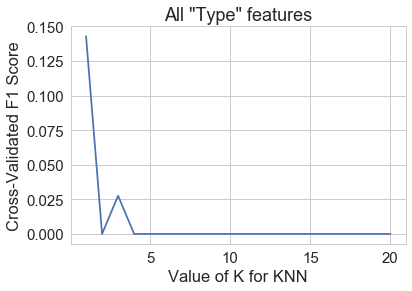

In [79]:
k_best_type=cal_knn(X_type,y_type,'All "Type" features','f1')

In [80]:
k_score_type=cal_knn(X_type,y_type,'All "Type" features','f1',k_best_type)

Mean of scores for k:1 is 0.1428879796688079 


## KNN with Brand Feature

In [81]:
features.columns

Index(['weekday', 'company_Coca Cola', 'company_Microsoft', 'company_Nike',
       'company_P&G', 'company_Starbucks', 'brand_All', 'brand_Aquarius',
       'brand_Ciel', 'brand_Coca Cola Life', 'brand_Dasani', 'brand_DelValle',
       'brand_DietCoke', 'brand_Fanta', 'brand_Fresca', 'brand_Fuze',
       'brand_FuzeTea', 'brand_Georgia', 'brand_GoldenPeak', 'brand_HonestTea',
       'brand_Ilohas', 'brand_MellowYellow', 'brand_Microsoft',
       'brand_MinuteMaid', 'brand_Nike', 'brand_Odwalla', 'brand_P&G',
       'brand_Power Rider', 'brand_Powerade', 'brand_Schweppes',
       'brand_SimplyOrange', 'brand_SmartWater', 'brand_Sprite',
       'brand_Starbucks', 'brand_VitaminWater', 'type_event', 'type_link',
       'type_note', 'type_offer', 'type_photo', 'type_status', 'type_video',
       'rank_order_No Order', 'rank_order_chronological', 'rank_order_ranked',
       'Hour_0', 'Hour_1', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Ho

In [82]:
X_brand, X_test, y_brand, y_test = train_test_split(features[['brand_All', 'brand_Aquarius',
       'brand_Ciel', 'brand_Coca Cola Life', 'brand_Dasani', 'brand_DelValle',
       'brand_DietCoke', 'brand_Fanta', 'brand_Fresca', 'brand_Fuze',
       'brand_FuzeTea', 'brand_Georgia', 'brand_GoldenPeak', 'brand_HonestTea',
       'brand_Ilohas', 'brand_MellowYellow', 'brand_Microsoft',
       'brand_MinuteMaid', 'brand_Nike', 'brand_Odwalla', 'brand_P&G',
       'brand_Power Rider', 'brand_Powerade', 'brand_Schweppes',
       'brand_SimplyOrange', 'brand_SmartWater', 'brand_Sprite',
       'brand_Starbucks', 'brand_VitaminWater']]\
                                        , target, test_size=.2, random_state=10) #hold out 20% of the data for final testing

Best score 0.329292449677
Best k value : 1


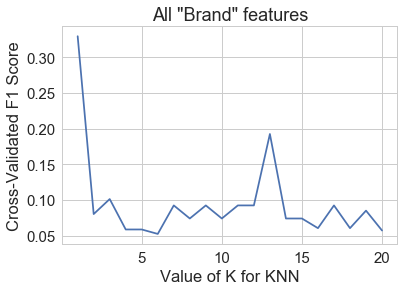

In [83]:
k_best_brand=cal_knn(X_brand,y_brand,'All "Brand" features','f1')

In [84]:
k_score_brand=cal_knn(X_brand,y_brand,'All "Type" features','f1',k_best_brand)

Mean of scores for k:1 is 0.3292924496766224 


## KNN with Company related data

In [85]:
X_comp, X_test, y_comp, y_test = train_test_split(features[['company_Coca Cola', 'company_Microsoft', 'company_Nike',
       'company_P&G', 'company_Starbucks']]\
                                        , target, test_size=.2, random_state=10) #hold out 20% of the data for final testing

Best score 0.166160574165
Best k value : 3


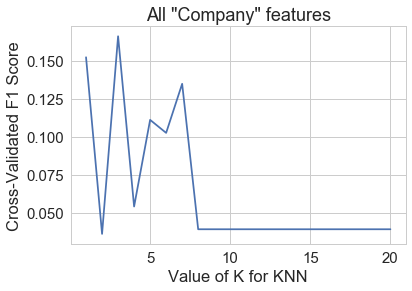

In [86]:
k_best_comp=cal_knn(X_comp,y_comp,'All "Company" features','f1')

In [87]:
k_score_comp=cal_knn(X_comp,y_comp,'All "Type" features','f1',k_best_comp)

Mean of scores for k:3 is 0.16616057416476446 



## KNN with weekday column

In [88]:
X_week, X_test, y_week, y_test = train_test_split(features[['weekday']]\
                                        , target, test_size=.2, random_state=10) #hold out 20% of the data for final testing

Best score 0.0
Best k value : 1


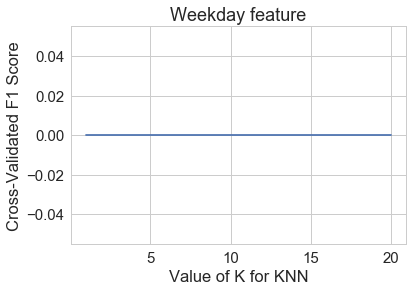

In [89]:
k_best_week=cal_knn(X_week,y_week,'Weekday feature','f1')

In [90]:
k_score_week=cal_knn(X_week,y_week,'','f1',k_best_week)

Mean of scores for k:1 is 0.0 


## KNN with Hour of the day feature

In [92]:
X_hour, X_test, y_hour, y_test = train_test_split(features[['Hour_0', 'Hour_1', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_2', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9']]\
                  , target, test_size=.2, random_state=10) #hold out 20% of the data for final testing

Best score 0.064240412512
Best k value : 1


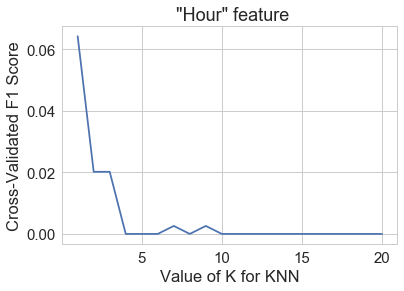

In [93]:
k_best_hour=cal_knn(X_hour,y_hour,' "Hour" feature','f1')

In [94]:
k_score_hour=cal_knn(X_hour,y_hour,'Hour Features ','f1',k_best_hour)

Mean of scores for k:1 is 0.06424041251199042 


## KNN with Rank feature

In [95]:
X_rank, X_test, y_rank, y_test = train_test_split(features[['rank_order_No Order', 'rank_order_chronological', 'rank_order_ranked']]\
                                        , target, test_size=.2, random_state=10) 

Best score 0.0595237520278
Best k value : 1


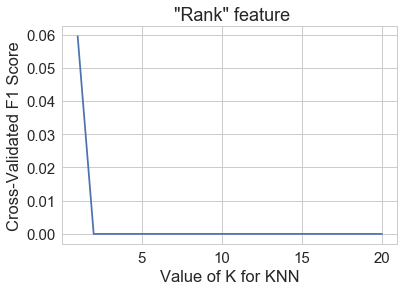

In [96]:
k_best_rank=cal_knn(X_rank,y_rank,' "Rank" feature','f1')

In [97]:
k_score_rank=cal_knn(X_rank,y_rank,' ','f1',k_best_rank)

Mean of scores for k:1 is 0.059523752027844976 


## Based on the Above Baselining KNN with Brand, Company, PostType ,Rank and Hour features

In [98]:
X_all, X_test, y_all, y_test = train_test_split(features.drop('weekday',axis=1)\
                                        , target, test_size=.2, random_state=10) 
#hold out 20% of the data for final testing

Best score 0.523919404504
Best k value : 13


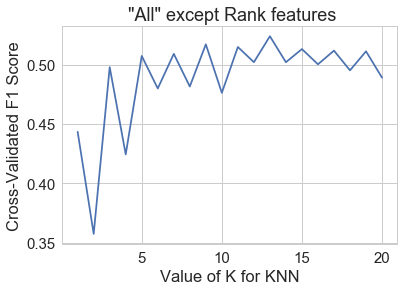

In [99]:
k_best_all=cal_knn(X_all,y_all,' "All" except weekday features','f1')


In [101]:
k_score_all=cal_knn(X_all,y_all,' ','f1',k_best_all)

Mean of scores for k:13 is 0.523919404504329 


## Plotting the KNN scores for every set of features

Text(0.5,1,'KNN Scores for Baselining')

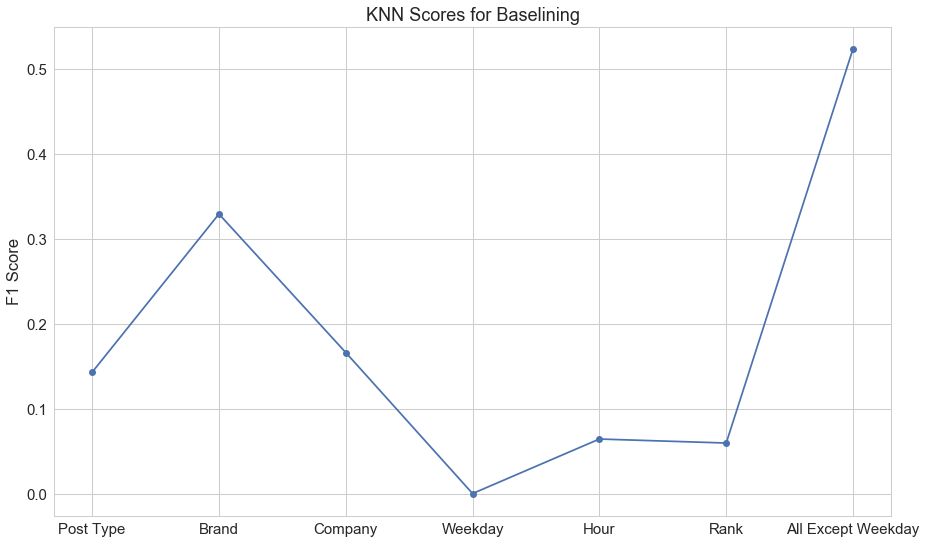

In [110]:


knn_scores=[k_score_type,k_score_brand,k_score_comp,k_score_week,k_score_hour,k_score_rank,k_score_all]

knn_features=['Post Type','Brand','Company','Weekday','Hour','Rank','All Except Weekday']

plt.figure(figsize=(15,9))
plt.plot(np.arange(1,len(knn_scores)+1),(knn_scores),marker='o');
plt.xticks(np.arange(1,len(knn_features)+1),knn_features);
plt.ylabel('F1 Score')
plt.title("KNN Scores for Baselining")

## Creating a Test Data from the data set

In [111]:
X_data, X_test_data, y_data, y_test_data = train_test_split(features.drop('weekday',axis=1)\
                                        , target, test_size=.3, random_state=10)

In [298]:
## Defining a function for Cross Validation K Folds


In [299]:
#def KFold_CV(X,Y):
    
    

## Oversampling the target data for KNN

In [300]:
# randomly oversample positive samples to be 40% of targets 

In [112]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
knn_scores_=[]

ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)
for k in range(1,21):
    knn_scores_all_train= [] #collect the validation results for both models
    knn_scores_all_val= []
    X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
    for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
        X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
        X_train,y_train = ROS.fit_sample(X_train, y_train)
        X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        knn_scores_all_train.append(metrics.f1_score(y_train,knn.predict(X_train)))
        
        knn_scores_all_val.append(metrics.f1_score(y_val,knn.predict(X_val)))
    
    knn_scores_.append(np.mean(knn_scores_all_val))
    print('Mean of Training F1 Score for k :',k,np.mean(knn_scores_all_train))
    print('Mean of Validation F1 Score for k :',k,np.mean(knn_scores_all_val))
print('Best KNN Score on Validation Data: for k' ,np.argmax((knn_scores_))+1,max(knn_scores_))


Mean of Training F1 Score for k : 1 0.603793940065
Mean of Validation F1 Score for k : 1 0.419311930233
Mean of Training F1 Score for k : 2 0.491505130089
Mean of Validation F1 Score for k : 2 0.335940719722
Mean of Training F1 Score for k : 3 0.668592913168
Mean of Validation F1 Score for k : 3 0.475839322713
Mean of Training F1 Score for k : 4 0.565443273887
Mean of Validation F1 Score for k : 4 0.401082431689
Mean of Training F1 Score for k : 5 0.677497008985
Mean of Validation F1 Score for k : 5 0.516140829341
Mean of Training F1 Score for k : 6 0.621505331002
Mean of Validation F1 Score for k : 6 0.470386130694
Mean of Training F1 Score for k : 7 0.665987382439
Mean of Validation F1 Score for k : 7 0.513199383857
Mean of Training F1 Score for k : 8 0.625514507574
Mean of Validation F1 Score for k : 8 0.498220540029
Mean of Training F1 Score for k : 9 0.667073505519
Mean of Validation F1 Score for k : 9 0.520835891
Mean of Training F1 Score for k : 10 0.632204038951
Mean of Validat

In [118]:
np.argmax((knn_scores_))+1

13

In [117]:
## for k = 13
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
print('KNN on Test Data : ',metrics.f1_score(y_test_data,knn.predict(X_test_data)))
print('ROC AUC Score for Test Data: ',metrics.roc_auc_score(y_test_data, knn.predict_proba(X_test_data)[:,1]))

KNN on Test Data :  0.523031203566
ROC AUC Score for Test Data:  0.891478498314


In [119]:
features_mod=features.drop('weekday',axis=1)

## Optimizing F1 Score by using Logistic Regression Model

### Making Train Validation set for oversampled data

In [120]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
log_scores_all_train= [] #collect the validation results for both models
log_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    lg_r=LogisticRegression(C=100000000000)
    lg_r.fit(X_train,y_train)
    #y_pred_val=lg_r.predict(X_train)
    log_scores_all_train.append(metrics.f1_score(y_train,lg_r.predict(X_train)))
    
    
    log_scores_all_val.append(metrics.f1_score(y_val,lg_r.predict(X_val)))
    
    
        
print('Mean of Training F1 Score  :',np.mean(log_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(log_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,lg_r.predict(X_test_data)))

Mean of Training F1 Score  : 0.618141009153
Mean of Validation F1 Score  : 0.496186531145
Test Data F1 Score : 0.4825


In [121]:
def plot_confusion_matrix(cm,labels,title, cmap=plt.cm.get_cmap('RdBu_r')):#plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
   ## ax.set_xticklabels([''] + labels)
   ## ax.set_yticklabels([''] + labels)
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## F1 score is not improving so moving on with SVM model

Mean of Training F1 Score  : 0.644441157982
Mean of Validation F1 Score  : 0.523967161063
Test Data F1 Score : 0.507462686567


Accuracy:               0.91
Precision:              0.43
Recall:                 0.62
F1 Score:               0.51


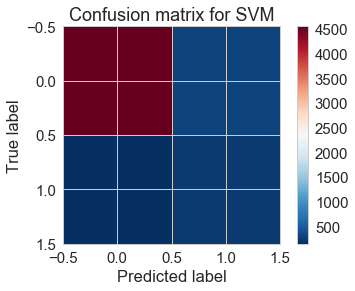

In [122]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
svm_scores_all_train= [] #collect the validation results for both models
svm_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    svm_mod=svm.SVC(kernel='linear')
    svm_mod.fit(X_train,y_train)
    
    svm_scores_all_train.append(metrics.f1_score(y_train,svm_mod.predict(X_train)))
    
    
    svm_scores_all_val.append(metrics.f1_score(y_val,svm_mod.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(svm_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(svm_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,svm_mod.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, svm_mod.predict(X_test_data), labels=None)
conf=cm
    
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))

## Cross Validation and tuning SVM parameters

### C=.01

Mean of Training F1 Score  : 0.442886216924
Mean of Validation F1 Score  : 0.383348435245
Test Data F1 Score : 0.367479674797


Accuracy:               0.93
Precision:              0.49
Recall:                 0.29
F1 Score:               0.37


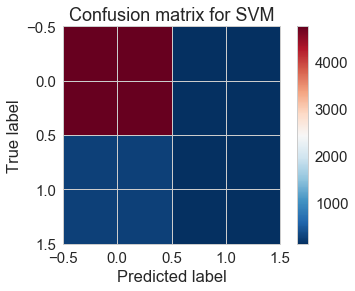

In [123]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
svm_scores_all_train= [] #collect the validation results for both models
svm_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    svm_mod=svm.SVC(kernel='linear',C=.01)
    svm_mod.fit(X_train,y_train)
    
    svm_scores_all_train.append(metrics.f1_score(y_train,svm_mod.predict(X_train)))
    
    
    svm_scores_all_val.append(metrics.f1_score(y_val,svm_mod.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(svm_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(svm_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,svm_mod.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, svm_mod.predict(X_test_data), labels=None)
conf=cm   
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))



### C=.1

Mean of Training F1 Score  : 0.580050029416
Mean of Validation F1 Score  : 0.472670421472
Test Data F1 Score : 0.503171247357


Accuracy:               0.91
Precision:              0.42
Recall:                 0.62
F1 Score:               0.50


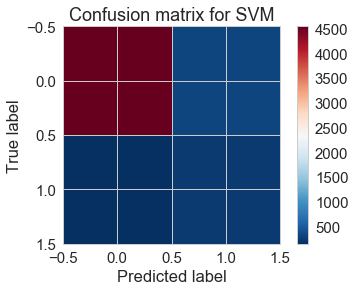

In [124]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
svm_scores_all_train= [] #collect the validation results for both models
svm_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    svm_mod=svm.SVC(kernel='linear',C=.1)
    svm_mod.fit(X_train,y_train)
    
    svm_scores_all_train.append(metrics.f1_score(y_train,svm_mod.predict(X_train)))
    
    
    svm_scores_all_val.append(metrics.f1_score(y_val,svm_mod.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(svm_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(svm_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,svm_mod.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, svm_mod.predict(X_test_data), labels=None)
conf=cm    
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))






### C=10

Mean of Training F1 Score  : 0.64661711735
Mean of Validation F1 Score  : 0.522318352269
Test Data F1 Score : 0.507430997877


Accuracy:               0.91
Precision:              0.43
Recall:                 0.62
F1 Score:               0.51


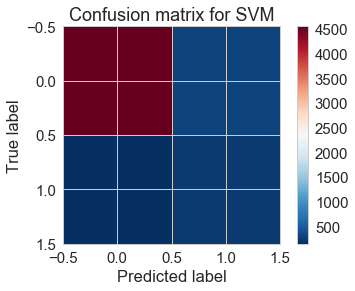

In [125]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
svm_scores_all_train= [] #collect the validation results for both models
svm_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    svm_mod=svm.SVC(kernel='linear',C=10)
    svm_mod.fit(X_train,y_train)
    
    svm_scores_all_train.append(metrics.f1_score(y_train,svm_mod.predict(X_train)))
    
    
    svm_scores_all_val.append(metrics.f1_score(y_val,svm_mod.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(svm_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(svm_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,svm_mod.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, svm_mod.predict(X_test_data), labels=None)
conf=cm    
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


### C=100

Mean of Training F1 Score  : 0.64661711735
Mean of Validation F1 Score  : 0.522318352269
Test Data F1 Score : 0.507430997877


Accuracy:               0.91
Precision:              0.43
Recall:                 0.62
F1 Score:               0.51


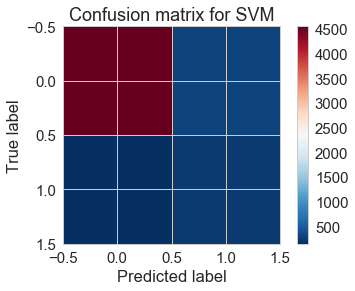

In [126]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
svm_scores_all_train= [] #collect the validation results for both models
svm_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    svm_mod=svm.SVC(kernel='linear',C=100)
    svm_mod.fit(X_train,y_train)
    
    svm_scores_all_train.append(metrics.f1_score(y_train,svm_mod.predict(X_train)))
    
    
    svm_scores_all_val.append(metrics.f1_score(y_val,svm_mod.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(svm_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(svm_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,svm_mod.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, svm_mod.predict(X_test_data), labels=None)
conf=cm    
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))



## SVM model RBF kernel 

### RBF kernel with C=1

Mean of Training F1 Score  : 0.520070118708
Mean of Validation F1 Score  : 0.428629384184
Test Data F1 Score : 0.419047619048


Accuracy:               0.92
Precision:              0.44
Recall:                 0.40
F1 Score:               0.42


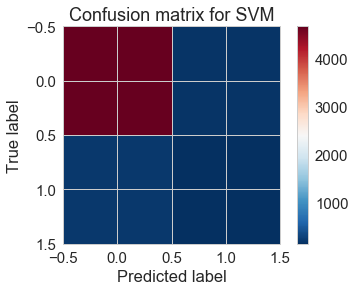

In [127]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
svm_scores_all_train= [] #collect the validation results for both models
svm_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    svm_mod=svm.SVC(kernel='rbf',C=1)
    svm_mod.fit(X_train,y_train)
    
    svm_scores_all_train.append(metrics.f1_score(y_train,svm_mod.predict(X_train)))
    
    
    svm_scores_all_val.append(metrics.f1_score(y_val,svm_mod.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(svm_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(svm_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,svm_mod.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, svm_mod.predict(X_test_data), labels=None)
conf=cm     
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


### C=10

Mean of Training F1 Score  : 0.648035610187
Mean of Validation F1 Score  : 0.527926236431
Test Data F1 Score : 0.511827956989


Accuracy:               0.91
Precision:              0.44
Recall:                 0.62
F1 Score:               0.51


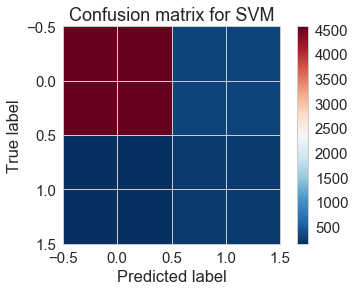

In [128]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
svm_scores_all_train= [] #collect the validation results for both models
svm_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    svm_mod=svm.SVC(kernel='rbf',C=10)
    svm_mod.fit(X_train,y_train)
    
    svm_scores_all_train.append(metrics.f1_score(y_train,svm_mod.predict(X_train)))
    
    
    svm_scores_all_val.append(metrics.f1_score(y_val,svm_mod.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(svm_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(svm_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,svm_mod.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, svm_mod.predict(X_test_data), labels=None)
conf=cm     
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


### C=100 SVM RBF model

Mean of Training F1 Score  : 0.689466115619
Mean of Validation F1 Score  : 0.553315542088
Test Data F1 Score : 0.538555691554


Accuracy:               0.93
Precision:              0.51
Recall:                 0.57
F1 Score:               0.54
CPU times: user 47.3 s, sys: 570 ms, total: 47.9 s
Wall time: 51 s


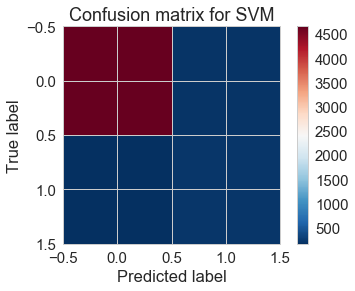

In [129]:
%%time
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
svm_scores_all_train= [] #collect the validation results for both models
svm_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    svm_mod=svm.SVC(kernel='rbf',C=100)
    svm_mod.fit(X_train,y_train)
    
    svm_scores_all_train.append(metrics.f1_score(y_train,svm_mod.predict(X_train)))
    
    
    svm_scores_all_val.append(metrics.f1_score(y_val,svm_mod.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(svm_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(svm_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,svm_mod.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, svm_mod.predict(X_test_data), labels=None)
conf=cm     
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


## Gamma value 10

Mean of Training F1 Score  : 0.750642874728
Mean of Validation F1 Score  : 0.528597279472
Test Data F1 Score : 0.496714848883


Accuracy:               0.93
Precision:              0.50
Recall:                 0.49
F1 Score:               0.50
CPU times: user 46.7 s, sys: 637 ms, total: 47.3 s
Wall time: 48.1 s


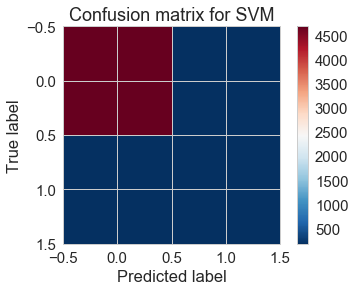

In [130]:
%%time
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
svm_scores_all_train= [] #collect the validation results for both models
svm_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    svm_mod=svm.SVC(kernel='rbf',C=100,gamma=10)
    svm_mod.fit(X_train,y_train)
    
    svm_scores_all_train.append(metrics.f1_score(y_train,svm_mod.predict(X_train)))
    
    
    svm_scores_all_val.append(metrics.f1_score(y_val,svm_mod.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(svm_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(svm_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,svm_mod.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, svm_mod.predict(X_test_data), labels=None)
conf=cm     
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


## C=1000

Mean of Training F1 Score  : 0.727885299595
Mean of Validation F1 Score  : 0.551881049299
Test Data F1 Score : 0.526315789474


Accuracy:               0.93
Precision:              0.50
Recall:                 0.49
F1 Score:               0.50
CPU times: user 1min 10s, sys: 533 ms, total: 1min 10s
Wall time: 1min 11s


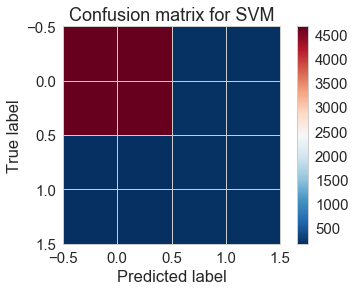

In [131]:
%%time
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
svm_scores_all_train= [] #collect the validation results for both models
svm_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
    svm_mod=svm.SVC(kernel='rbf',C=1000)
    svm_mod.fit(X_train,y_train)
    
    svm_scores_all_train.append(metrics.f1_score(y_train,svm_mod.predict(X_train)))
    
    
    svm_scores_all_val.append(metrics.f1_score(y_val,svm_mod.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(svm_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(svm_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,svm_mod.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, svm_mod.predict(X_test_data), labels=None)
    
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


## Bayes NB model

In [132]:
#bnb = BernoulliNB()
mnb = MultinomialNB(alpha=1)
# Fit the model to the training data
#mnb.fit(xtrain, ytrain)
# Score the model against the test data
#mnb.score(binary_test_dtm, y_test)

Bayes NB Model
Accuracy: 0.900081566069
Accuracy: 0.890701468189
Accuracy: 0.889477977162
Accuracy: 0.902528548124
Accuracy: 0.897634584013
Mean of Training F1 Score  : 0.726741615533
Mean of Validation F1 Score  : 0.492626918993
Test Data F1 Score : 0.479768786127


Accuracy:               0.93
Precision:              0.50
Recall:                 0.49
F1 Score:               0.50


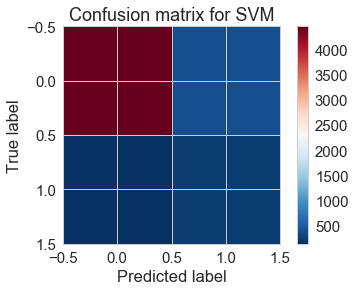

In [133]:
print('Bayes NB Model')
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
mnb_scores_all_train= [] #collect the validation results for both models
mnb_scores_all_val= []
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.5, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
    
    mnb = MultinomialNB(alpha=1)
    mnb.fit(X_train,y_train)
    y_predict_val=mnb.predict(X_val)
    print('Accuracy:',mnb.score(X_val,y_val))
    #mnb_scores_all_trainmetrics.f1_score(yval,ypredictval))
    
    mnb_scores_all_train.append(metrics.f1_score(y_train,mnb.predict(X_train)))
    
    
    mnb_scores_all_val.append(metrics.f1_score(y_val,mnb.predict(X_val)))
    
    
print('Mean of Training F1 Score  :',np.mean(mnb_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(mnb_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,mnb.predict(X_test_data)))


    
cm=confusion_matrix(y_test_data, mnb.predict(X_test_data), labels=None)
    
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for SVM')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f" %p)
print ("Recall:                 %0.2f"% r)

print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


## Trying Decision Tree Model

In [135]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = [ 'f1']

dtc_tuned_param=[{'class_weight':['balanced'],'max_depth':[5]}]

In [137]:
%%time
dtc_tuned_param=[{'class_weight':['balanced'],'max_depth':[5]}]
clf = GridSearchCV(DecisionTreeClassifier(),dtc_tuned_param, cv=5, scoring='f1')
X_train_dtc, X_val_dtc, y_train_dtc, y_val_dtc = train_test_split(X_data_arr,y_data_arr, test_size=.3, random_state=2911) 


#clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring=score)
clf.fit(X_train_dtc, y_train_dtc)

print("Best parameters set found on development set:")
print()
print(clf.best_estimator_)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full validation set.")
print()
y_val_dtc, y_pred_dtc = y_val_dtc, clf.predict(X_val_dtc)
print(classification_report(y_val_dtc, y_pred_dtc))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full test set.")
print()
y_test_data, y_pred_test = y_test_data, clf.predict(X_test_data)
print(classification_report(y_test_data, y_pred_test))
print()
conf = confusion_matrix(y_test_data, y_pred_test)
print( conf)

Best parameters set found on development set:

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Grid scores on development set:

0.463 (+/-0.026) for {'class_weight': 'balanced', 'max_depth': 5}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full validation set.

             precision    recall  f1-score   support

          0       0.97      0.92      0.95      3414
          1       0.39      0.67      0.49       264

avg / total       0.93      0.90      0.91      3678


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full test set.

             prec

In [138]:
clf.best_params_

{'class_weight': 'balanced', 'max_depth': 5}

## Random Forest Classifier

Accuracy: 0.22388762441
Accuracy: 0.214501026431
Accuracy: 0.254215238953
Accuracy: 0.257046766747
Accuracy: 0.257618640956
Mean of Training F1 Score  : 0.649924951802
Mean of Validation F1 Score  : 0.549063822518
Test Data F1 Score : 0.514685314685


Accuracy:               0.90
Precision:              0.40
Recall:                 0.64
F1 Score:               0.50


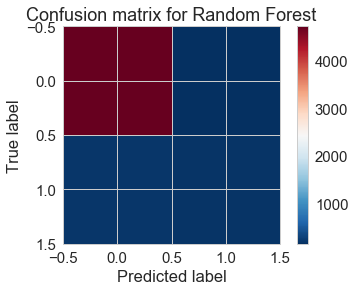

In [139]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
rf_scores_all_train= [] #collect the validation results for both models
rf_scores_all_val= [] 
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
    
    rfmodel = RandomForestRegressor(n_estimators = 1000,max_depth=6)
    rfmodel.fit(X_train,y_train)
    y_predict_tr=rfmodel.predict(X_train)
    y_predict_val=rfmodel.predict(X_val)
    print('Accuracy:',rfmodel.score(X_val,y_val))
    #mnb_scores_all_trainmetrics.f1_score(yval,ypredictval))
    
    rf_scores_all_train.append(metrics.f1_score(y_train,y_predict_tr.round()))
    
    
    rf_scores_all_val.append(metrics.f1_score(y_val,y_predict_val.round()))
    
    
print('Mean of Training F1 Score  :',np.mean(rf_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(rf_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,rfmodel.predict(X_test_data).round()))

cm=confusion_matrix(y_test_data, rfmodel.predict(X_test_data).round(), labels=None)
    
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for Random Forest')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f"%p)
print ("Recall:                 %0.2f"%r)
print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


In [ ]:
y_predict_tr


## Gradient Boosting

Score: 0.120967568615
Score: 0.125528452311
Score: 0.189024635134
Score: 0.1370803179
Score: 0.120341785245
Mean of Training F1 Score  : 0.920111718332
Mean of Validation F1 Score  : 0.928801877914
Test Data F1 Score : 0.925727364927


Accuracy:               0.93
Precision:              0.50
Recall:                 0.49
F1 Score:               0.50
CPU times: user 18min 38s, sys: 4.74 s, total: 18min 43s
Wall time: 22min 11s


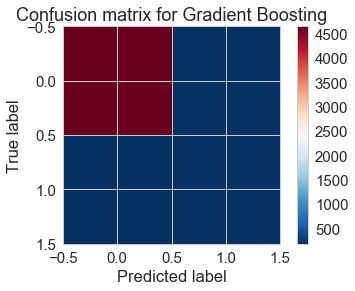

In [326]:
%%time
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
rf_scores_all_train= [] #collect the validation results for both models
rf_scores_all_val= [] 
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 

    gbmodel = GradientBoostingRegressor(n_estimators = 10000, max_depth = 5)##
    gbmodel.fit(X_train,y_train)
    y_predict_tr=gbmodel.predict(X_train)
    y_predict_val=gbmodel.predict(X_val)
    print('Score:',gbmodel.score(X_val,y_val))
    #mnb_scores_all_trainmetrics.f1_score(yval,ypredictval))
    
    rf_scores_all_train.append(metrics.f1_score(y_train,y_predict_tr.round(),average='weighted'))
    
    
    rf_scores_all_val.append(metrics.f1_score(y_val,y_predict_val.round(),average='weighted'))
    
    
print('Mean of Training F1 Score  :',np.mean(rf_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(rf_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,gbmodel.predict(X_test_data).round(),average='weighted'))

cm=confusion_matrix(y_test_data, gbmodel.predict(X_test_data).round(), labels=None)
conf=cm    
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for Gradient Boosting')
#p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
#r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
#print ('\n')
#print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
#print ("Precision:              %0.2f"%p)
#print ("Recall:                 %0.2f"%r)
#print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


In [140]:
cm

array([[4724,  145],
       [ 202,  184]])

Score: 0.141459017924
Score: 0.135143371154
Score: 0.19656104996
Score: 0.156141050251
Score: 0.171359738507
Mean of Training F1 Score  : 0.919771510579
Mean of Validation F1 Score  : 0.927119002188
Test Data F1 Score : 0.926538228533
[[4657  212]
 [ 181  205]]


Accuracy:               0.93
Precision:              0.49
Recall:                 0.53
F1 Score:               0.51
CPU times: user 2min 32s, sys: 1.18 s, total: 2min 34s
Wall time: 2min 36s


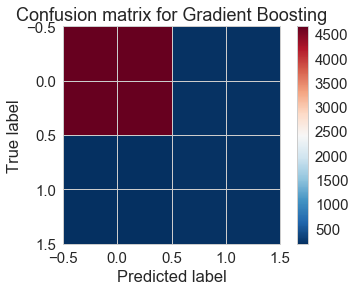

In [141]:
%%time
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
rf_scores_all_train= [] #collect the validation results for both models
rf_scores_all_val= [] 
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 

    gbmodel = GradientBoostingRegressor(n_estimators = 1000, max_depth = 5,learning_rate=.1)##
    gbmodel.fit(X_train,y_train)
    y_predict_tr=gbmodel.predict(X_train)
    y_predict_val=gbmodel.predict(X_val)
    print('Score:',gbmodel.score(X_val,y_val))
    #mnb_scores_all_trainmetrics.f1_score(yval,ypredictval))
    
    rf_scores_all_train.append(metrics.f1_score(y_train,y_predict_tr.round(),average='weighted'))
    
    
    rf_scores_all_val.append(metrics.f1_score(y_val,y_predict_val.round(),average='weighted'))
    
    
print('Mean of Training F1 Score  :',np.mean(rf_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(rf_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(y_test_data,gbmodel.predict(X_test_data).round(),average='weighted'))

cm=confusion_matrix(y_test_data, gbmodel.predict(X_test_data).round(), labels=None)
print(cm) 
conf=cm 
plt.figure()
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for Gradient Boosting')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f"%p)
print ("Recall:                 %0.2f"%r)
print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


In [145]:
%%time
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
xgb_scores_all_train= [] #collect the validation results for both models
xgb_scores_all_val= [] 
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
        
    X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
    X_train,y_train = ROS.fit_sample(X_train, y_train)
    X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
    
    
    xgbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

    eval_set=[(X_train,y_train),(X_val,y_val)]
    fit_model = xgbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

    y_predict_tr=xgbm.predict(X_train)
    y_predict_val=xgbm.predict(X_val)
    print('Score:',xgbm.score(X_val,y_val))
    #mnb_scores_all_trainmetrics.f1_score(yval,ypredictval))
    
    (xgb_scores_all_train.append(metrics.f1_score(y_train,y_predict_tr)))
    
    
    (xgb_scores_all_val.append(metrics.f1_score(y_val,y_predict_val)))
print(np.mean(xgb_scores_all_train))
print(np.mean(xgb_scores_all_val))

Score: 0.919657422512
Score: 0.934747145188
Score: 0.913132137031
Score: 0.940048939641
Score: 0.93515497553
0.633167308207
0.530792433776
CPU times: user 14.6 s, sys: 116 ms, total: 14.7 s
Wall time: 14.8 s


Mean of Training F1 Score  : 0.633167308207
Mean of Validation F1 Score  : 0.530792433776
Test Data F1 Score : 0.527624309392
[[4722  147]
 [ 195  191]]


Accuracy:               0.93
Precision:              0.57
Precision Metrics: %0.2f 0.565088757396
Recall:                 0.49
F1 Score:               0.53


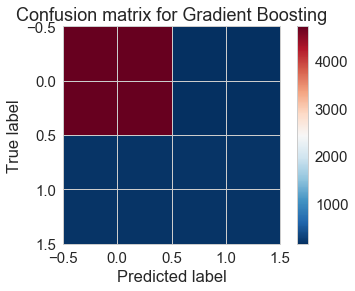

In [147]:
print('Mean of Training F1 Score  :',np.mean(xgb_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(xgb_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(np.array(y_test_data),xgbm.predict(np.array(X_test_data))))

cm=confusion_matrix(np.array(y_test_data), xgbm.predict(np.array(X_test_data)), labels=None)
print(cm)    
plt.figure()
conf=cm
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for Gradient Boosting')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f"%p)
print("Precision Metrics: %0.2f",metrics.precision_score(y_test_data,xgbm.predict(np.array(X_test_data))))
print ("Recall:                 %0.2f"%r)
print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))


## For Varying Depths

In [148]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
xgb_scores_all_train= [] #collect the validation results for both models
xgb_scores_all_val= [] 
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for depth in [1,2,3,4,5,6,7,8,9]:
    depth_score_tr=[]
    depth_score_val=[]
    for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
            
        X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
        X_train,y_train = ROS.fit_sample(X_train, y_train)
        X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
        
        
        xgbm = xgb.XGBClassifier( 
                                n_estimators=30000,
                                max_depth=depth,
                                objective='binary:logistic', #new objective
                                learning_rate=.05, 
                                subsample=.8,
                                min_child_weight=3,
                                colsample_bytree=.8
                               )
        
        eval_set=[(X_train,y_train),(X_val,y_val)]
        fit_model = xgbm.fit( 
                            X_train, y_train, 
                            eval_set=eval_set,
                            eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                            early_stopping_rounds=50,
                            verbose=False
                           )
        
        y_predict_tr=xgbm.predict(X_train)
        y_predict_val=xgbm.predict(X_val)
            #print('Score:',xgbm.score(X_val,y_val))
            #mnb_scores_all_trainmetrics.f1_score(yval,ypredictval))
        depth_score_tr.append(metrics.f1_score(y_train,y_predict_tr))
        depth_score_val.append(metrics.f1_score(y_val,y_predict_val))
            
    print(depth)
    xgb_scores_all_train.append(np.mean(depth_score_tr))
    
    
    xgb_scores_all_val.append(np.mean(depth_score_val))
print('Best Score for depth Validation:',max(xgb_scores_all_val),np.argmax(xgb_scores_all_val)+1)
print('Best Score for depth Train:',max(xgb_scores_all_train),np.argmax(xgb_scores_all_train)+1)


1
2
3
4
5
6
7
8
9
Best Score for depth Validation: 0.558124393417 9
Best Score for depth Train: 0.679017576271 9


In [149]:
for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
            
        X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
        X_train,y_train = ROS.fit_sample(X_train, y_train)
        X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
        
        
        xgbm = xgb.XGBClassifier( 
                                n_estimators=30000,
                                max_depth=9,
                                objective='binary:logistic', #new objective
                                learning_rate=.05, 
                                subsample=.8,
                                min_child_weight=3,
                                colsample_bytree=.8
                               )
        
        eval_set=[(X_train,y_train),(X_val,y_val)]
        fit_model = xgbm.fit( 
                            X_train, y_train, 
                            eval_set=eval_set,
                            eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                            early_stopping_rounds=50,
                            verbose=False
                           )
        
        y_predict_tr=xgbm.predict(X_train)
        y_predict_val=xgbm.predict(X_val)
            #print('Score:',xgbm.score(X_val,y_val))
            #mnb_scores_all_trainmetrics.f1_score(yval,ypredictval))
        #depth_score_tr.append(metrics.f1_score(y_train,y_predict_tr))
        #depth_score_val.append(metrics.f1_score(y_val,y_predict_val))
        xgb_scores_all_train.append(metrics.f1_score(y_train,y_predict_tr))
        xgb_scores_all_val.append(metrics.f1_score(y_val,y_predict_val))
    #print(depth)
    #xgb_scores_all_train.append(np.mean(depth_score_tr))
    
    
    #xgb_scores_all_val.append(np.mean(depth_score_val))

Mean of Training F1 Score  : 0.633063225874
Mean of Validation F1 Score  : 0.529081940847
Test Data F1 Score : 0.559895833333
[[4702  167]
 [ 171  215]]


Accuracy:               0.94
Precision:              0.56
Precision Metrics: %0.2f 0.562827225131
Recall:                 0.56
F1 Score:               0.56


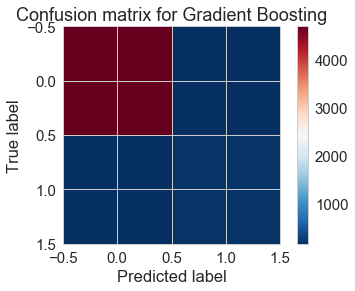

In [150]:
print('Mean of Training F1 Score  :',np.mean(xgb_scores_all_train))
print('Mean of Validation F1 Score  :',np.mean(xgb_scores_all_val))
print('Test Data F1 Score :',metrics.f1_score(np.array(y_test_data),xgbm.predict(np.array(X_test_data))))

cm=confusion_matrix(np.array(y_test_data), xgbm.predict(np.array(X_test_data)), labels=None)
print(cm)    
plt.figure()
conf=cm
plot_confusion_matrix(cm,labels=[0,1],title='Confusion matrix for Gradient Boosting')
p=(conf[1, 1] / (conf[0, 1] + conf[1, 1]))
r=(conf[1, 1] / (conf[1, 1] + conf[1, 0]))
print ('\n')
print ("Accuracy:               %0.2f"%((conf[0, 0]+conf[1, 1]) / (conf[0, 1] + conf[1, 0]+conf[0, 0]+conf[1, 1])))
print ("Precision:              %0.2f"%p)
print("Precision Metrics: %0.2f",metrics.precision_score(y_test_data,xgbm.predict(np.array(X_test_data))))
print ("Recall:                 %0.2f"%r)
print ("F1 Score:               %0.2f"%(2*p*r/(p+r)))

## Varying Learning Rate

In [151]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
xgb_scores_all_train= [] #collect the validation results for both models
xgb_scores_all_val= [] 
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for le_rate in [1,.01,.001,.0001,.05]:
    depth_score_tr=[]
    depth_score_val=[]
    for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
            
        X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
        X_train,y_train = ROS.fit_sample(X_train, y_train)
        X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
        
        
        xgbm = xgb.XGBClassifier( 
                                n_estimators=30000,
                                #max_depth=depth,
                                objective='binary:logistic', #new objective
                                learning_rate=le_rate, 
                                subsample=.8,
                                min_child_weight=3,
                                colsample_bytree=.8
                               )
        
        eval_set=[(X_train,y_train),(X_val,y_val)]
        fit_model = xgbm.fit( 
                            X_train, y_train, 
                            eval_set=eval_set,
                            eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                            early_stopping_rounds=50,
                            verbose=False
                           )
        
        y_predict_tr=xgbm.predict(X_train)
        y_predict_val=xgbm.predict(X_val)
            #print('Score:',xgbm.score(X_val,y_val))
            #mnb_scores_all_trainmetrics.f1_score(yval,ypredictval))
        depth_score_tr.append(metrics.f1_score(y_train,y_predict_tr))
        depth_score_val.append(metrics.f1_score(y_val,y_predict_val))
            
    print(le_rate)
    xgb_scores_all_train.append(np.mean(depth_score_tr))
    
    
    xgb_scores_all_val.append(np.mean(depth_score_val))
print('Best Score for Learning Rate Validation:',max(xgb_scores_all_val),np.argmax(xgb_scores_all_val)+1)
print('Best Score for Learning Rate Train:',max(xgb_scores_all_train),np.argmax(xgb_scores_all_train)+1)
diff_val_f1scores=[0.552323739634,0.512140411926,0.522893327426,0.383348435245,\
                   0.472670421472,0.522893327426,0.522893327426,0.535302793055,0.560216627403,\
                   0.569378512432,0.528597279472,0.576109254694,0.488931769179,0.558170109704,\
                   0.550906137555,0.52150078114,0.561573358422]
diff_test_f1=[0.548812664908,0.502314814815,0.503171247357,0.367479674797,\
              0.503171247357,0.503171247357,0.503171247357, 0.51775486827,0.530521642619,\
              0.540216086435,0.496714848883,0.540540540541,0.467652495379,0.525896414343,\
              0.538152610442,0.541496598639,0.540540540541]
diff_method=['KNN','Log 1e11','SVM Linear','SVM Lin C.01','SVM Lin C.1','SVM 10',\
             'RBF','RBF C=10','RBF C=100','RBF C=100 G=10','RBF C=1000','Bayes','Random Forest','XGB',\
             'XGB depth 6','XGB Learn 1']

1
0.01
0.001
0.0001
0.05
Best Score for depth Validation: 0.550450238141 1
Best Score for depth Train: 0.698866896206 1


In [ ]:
xgb_scores_all_val

## Varying estimators

In [152]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
xgb_scores_all_train= [] #collect the validation results for both models
xgb_scores_all_val= [] 
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.2, random_state=42)

X_data_arr,y_data_arr = np.array(X_data),np.array(y_data)
for est in [10000,15000,20000,25000,30000]:
    depth_score_tr=[]
    depth_score_val=[]
    for train_ind, val_ind in kf.split(X_data_arr,y_data_arr):
            
        X_train, y_train = X_data_arr[train_ind], y_data_arr[train_ind]
        X_train,y_train = ROS.fit_sample(X_train, y_train)
        X_val, y_val = X_data_arr[val_ind], y_data_arr[val_ind] 
        
        
        
        xgbm = xgb.XGBClassifier( 
                                n_estimators=est,
                                max_depth=9,
                                objective='binary:logistic', #new objective
                                learning_rate=1, 
                                subsample=.8,
                                min_child_weight=3,
                                colsample_bytree=.8
                               )
        
        eval_set=[(X_train,y_train),(X_val,y_val)]
        fit_model = xgbm.fit( 
                            X_train, y_train, 
                            eval_set=eval_set,
                            eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                            early_stopping_rounds=50,
                            verbose=False
                           )
        
        y_predict_tr=xgbm.predict(X_train)
        y_predict_val=xgbm.predict(X_val)
            #print('Score:',xgbm.score(X_val,y_val))
            #mnb_scores_all_trainmetrics.f1_score(yval,ypredictval))
        depth_score_tr.append(metrics.f1_score(y_train,y_predict_tr))
        depth_score_val.append(metrics.f1_score(y_val,y_predict_val))
            
    print(est)
    xgb_scores_all_train.append(np.mean(depth_score_tr))
    
    
    xgb_scores_all_val.append(np.mean(depth_score_val))
print('Best Score for Estimators Validation:',max(xgb_scores_all_val),np.argmax(xgb_scores_all_val)+1)
print('Best Score for Estimators Train:',max(xgb_scores_all_train),np.argmax(xgb_scores_all_train)+1)

10000
15000
20000
25000
30000
Best Score for depth Validation: 0.548177006118 1
Best Score for depth Train: 0.732601539872 1


In [154]:
depth_score_val

[0.54807692307692302,
 0.56385542168674696,
 0.54332552693208436,
 0.52604166666666663,
 0.55958549222797926]

In [ ]:
diff_val_f1scores=[0.552323739634,0.512140411926,0.522893327426,0.383348435245,\
                   0.472670421472,0.522893327426,0.522893327426,0.535302793055,0.560216627403,\
                   0.569378512432,0.528597279472,0.576109254694,0.488931769179,0.558170109704,\
                   0.550906137555,0.52150078114,0.561573358422,0.549877775071]
diff_test_f1=[0.548812664908,0.502314814815,0.503171247357,0.367479674797,\
              0.503171247357,0.503171247357,0.503171247357, 0.51775486827,0.530521642619,\
              0.540216086435,0.496714848883,0.540540540541,0.467652495379,0.525896414343,\
              0.538152610442,0.541496598639,0.540540540541,0.51775486827]
diff_method=['KNN','Log 1e11','SVM Linear','SVM Lin C.01','SVM Lin C.1','SVM 10',\
             'RBF','RBF C=10','RBF C=100','RBF C=100 G=10','RBF C=1000','Bayes','Random Forest','XGB',\
             'XGB depth 9','XGB Learn 1','XGB Est 10000']

In [163]:
x_tr=[]
x_val=[]
xgbm = xgb.XGBClassifier( 
                                n_estimators=15000,
                                max_depth=9,
                                objective='binary:logistic', #new objective
                                learning_rate=1, 
                                subsample=.8,
                                min_child_weight=3,
                                colsample_bytree=.8
                               )
        
eval_set=[(X_data,y_data),(X_test_data,y_test_data)]
fit_model = xgbm.fit( 
                            X_data,y_data, 
                            eval_set=eval_set,
                            eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                            early_stopping_rounds=50,
                            verbose=False
                           )
        
y_predict_tr=xgbm.predict(X_data)
y_predict_val=xgbm.predict(X_test_data)
#x_tr.append(metrics.f1_score(X_data,y_predict_tr.round()))
#x_val.append(metrics.f1_score(X_test_data,(y_predict_val.round())))

In [164]:
confu=confusion_matrix(y_test_data,y_predict_val)

In [165]:
confu

array([[4782,   87],
       [ 235,  151]])

In [166]:
posts_commnts_gp.head()

,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,can_like,has_liked,total_likes,total_reactions,viewer_reaction,shares_count,weekday,Response_Time,Hour,Viral
0,111652908860614_100385246688948,2010-08-18T06:52:00+0000,"sharing~ ""化妝保養品的故事"" - 給每一位關心自己愛美麗愛健康的妳\nhttp:/...",Coca Cola,Ilohas,video,The Story of Cosmetics (2010),FALSE,chronological,2.0,FALSE,FALSE,1.0,1.0,NONE,0.0,1,2.860000e+02,6,0
1,111652908860614_10202628859594679,2014-02-17T14:00:01+0000,[兼差人妻 in Tokyo] 前一陣子才去日本東北震災復興志工活動，回來就發現這個可愛的台...,Coca Cola,Ilohas,video,台灣頌之歌タイワンダー☆テーマソング,FALSE,ranked,0.0,FALSE,FALSE,14.0,14.0,NONE,0.0,1,1.000000e+14,14,0
2,111652908860614_10203107306712095,2014-01-09T14:23:39+0000,"有一個1/22(三)內湖社大社企研討會,主辦人是一位公益夥伴瓊齡,歡迎大家報名 : http...",Coca Cola,Ilohas,link,臺北市內湖社區大學 社會企業論壇2014-01-20 - BeClass 線上報名系統 On...,FALSE,ranked,0.0,FALSE,FALSE,5.0,5.0,NONE,0.0,1,1.000000e+14,14,0
3,111652908860614_10203294648028719,2014-03-18T12:30:00+0000,[社企流] 牛津博士上網賣菜 讓你輕鬆買到安心食材\n\n張駿極，一個已經邁入中年的科技業老...,Coca Cola,Ilohas,video,博士網路賣菜 - 張駿極,FALSE,ranked,1.0,FALSE,FALSE,15.0,15.0,NONE,0.0,1,1.690000e+02,12,0
4,111652908860614_10203294806992693,2014-03-25T12:30:00+0000,[社企流] 最飽足的餅乾，是最破碎的餅乾。\n\n在去年TEDxTaipei的演講中，「Te...,Coca Cola,Ilohas,video,擁抱世代從教育開始：劉安婷 (Anting Liu) at TEDxTaipei 2013,FALSE,ranked,0.0,FALSE,FALSE,16.0,16.0,NONE,3.0,1,1.000000e+14,12,0


## Text Analysis to include words as features

In [358]:
posts_commnts_gp.to_csv('Post_comments_gp.csv')


In [363]:
from langdetect import detect,language
import langdetect

In [369]:
from googletrans import Translator
translator = Translator()
for index, row in posts_commnts_gp.head().name.iteritems():
    try:
        trans_val = translator.translate(row).text
    except:
        trans_val = "No Translation available"

In [372]:
posts_commnts_gp.count()

post_id              17515
post_created_time    17515
post_message         17515
company              17515
brand                17515
type                 17515
name                 17515
can_comment          17515
rank_order           17515
total_comments       17515
can_like             17515
has_liked            17515
total_likes          17515
total_reactions      17515
viewer_reaction      17515
shares_count         17515
weekday              17515
Response_Time        17515
Hour                 17515
Viral                17515
dtype: int64

In [373]:
posts_commnts_gp.company.unique()

array(['Coca Cola', 'Nike', 'Microsoft', 'Starbucks', 'P&G'], dtype=object)

In [374]:
posts_commnts_gp.to_csv('Post_Comp_uni.csv')

In [375]:
from googletrans import Translator
from langdetect import detect

In [376]:
text_data=posts_commnts_gp

In [377]:
text_data.company.unique()

array(['Coca Cola', 'Nike', 'Microsoft', 'Starbucks', 'P&G'], dtype=object)

In [378]:
text_data.loc[text_data['name'].isnull(),'name']='No Name'

In [379]:
text_data[text_data['name'].isnull()].count()

post_id              0
post_created_time    0
post_message         0
company              0
brand                0
type                 0
name                 0
can_comment          0
rank_order           0
total_comments       0
can_like             0
has_liked            0
total_likes          0
total_reactions      0
viewer_reaction      0
shares_count         0
weekday              0
Response_Time        0
Hour                 0
Viral                0
dtype: int64

In [380]:
lang_dict={'af': 'Afrikaans',
 'af-ZA': 'Afrikaans (South Africa)',
 'ar': 'Arabic',
 'ar-AE': 'Arabic (U.A.E.)',
 'ar-BH': 'Arabic (Bahrain)',
 'ar-DZ': 'Arabic (Algeria)',
 'ar-EG': 'Arabic (Egypt)',
 'ar-IQ': 'Arabic (Iraq)',
 'ar-JO': 'Arabic (Jordan)',
 'ar-KW': 'Arabic (Kuwait)',
 'ar-LB': 'Arabic (Lebanon)',
 'ar-LY': 'Arabic (Libya)',
 'ar-MA': 'Arabic (Morocco)',
 'ar-OM': 'Arabic (Oman)',
 'ar-QA': 'Arabic (Qatar)',
 'ar-SA': 'Arabic (Saudi Arabia)',
 'ar-SY': 'Arabic (Syria)',
 'ar-TN': 'Arabic (Tunisia)',
 'ar-YE': 'Arabic (Yemen)',
 'az': 'Azeri (Latin)',
 'az-AZ': 'Azeri (Cyrillic) (Azerbaijan)',
 'be': 'Belarusian',
 'be-BY': 'Belarusian (Belarus)',
 'bg': 'Bulgarian',
 'bg-BG': 'Bulgarian (Bulgaria)',
 'bs-BA': 'Bosnian (Bosnia and Herzegovina)',
 'ca': 'Catalan',
 'ca-ES': 'Catalan (Spain)',
 'cs': 'Czech',
 'cs-CZ': 'Czech (Czech Republic)',
 'cy': 'Welsh',
 'cy-GB': 'Welsh (United Kingdom)',
 'da': 'Danish',
 'da-DK': 'Danish (Denmark)',
 'de': 'German',
 'de-AT': 'German (Austria)',
 'de-CH': 'German (Switzerland)',
 'de-DE': 'German (Germany)',
 'de-LI': 'German (Liechtenstein)',
 'de-LU': 'German (Luxembourg)',
 'dv': 'Divehi',
 'dv-MV': 'Divehi (Maldives)',
 'el': 'Greek',
 'el-GR': 'Greek (Greece)',
 'en': 'English',
 'en-AU': 'English (Australia)',
 'en-BZ': 'English (Belize)',
 'en-CA': 'English (Canada)',
 'en-CB': 'English (Caribbean)',
 'en-GB': 'English (United Kingdom)',
 'en-IE': 'English (Ireland)',
 'en-JM': 'English (Jamaica)',
 'en-NZ': 'English (New Zealand)',
 'en-PH': 'English (Republic of the Philippines)',
 'en-TT': 'English (Trinidad and Tobago)',
 'en-US': 'English (United States)',
 'en-ZA': 'English (South Africa)',
 'en-ZW': 'English (Zimbabwe)',
 'eo': 'Esperanto',
 'es': 'Spanish',
 'es-AR': 'Spanish (Argentina)',
 'es-BO': 'Spanish (Bolivia)',
 'es-CL': 'Spanish (Chile)',
 'es-CO': 'Spanish (Colombia)',
 'es-CR': 'Spanish (Costa Rica)',
 'es-DO': 'Spanish (Dominican Republic)',
 'es-EC': 'Spanish (Ecuador)',
 'es-ES': 'Spanish (Spain)',
 'es-GT': 'Spanish (Guatemala)',
 'es-HN': 'Spanish (Honduras)',
 'es-MX': 'Spanish (Mexico)',
 'es-NI': 'Spanish (Nicaragua)',
 'es-PA': 'Spanish (Panama)',
 'es-PE': 'Spanish (Peru)',
 'es-PR': 'Spanish (Puerto Rico)',
 'es-PY': 'Spanish (Paraguay)',
 'es-SV': 'Spanish (El Salvador)',
 'es-UY': 'Spanish (Uruguay)',
 'es-VE': 'Spanish (Venezuela)',
 'et': 'Estonian',
 'et-EE': 'Estonian (Estonia)',
 'eu': 'Basque',
 'eu-ES': 'Basque (Spain)',
 'fa': 'Farsi',
 'fa-IR': 'Farsi (Iran)',
 'fi': 'Finnish',
 'fi-FI': 'Finnish (Finland)',
 'fo': 'Faroese',
 'fo-FO': 'Faroese (Faroe Islands)',
 'fr': 'French',
 'fr-BE': 'French (Belgium)',
 'fr-CA': 'French (Canada)',
 'fr-CH': 'French (Switzerland)',
 'fr-FR': 'French (France)',
 'fr-LU': 'French (Luxembourg)',
 'fr-MC': 'French (Principality of Monaco)',
 'gl': 'Galician',
 'gl-ES': 'Galician (Spain)',
 'gu': 'Gujarati',
 'gu-IN': 'Gujarati (India)',
 'he': 'Hebrew',
 'he-IL': 'Hebrew (Israel)',
 'hi': 'Hindi',
 'hi-IN': 'Hindi (India)',
 'hr': 'Croatian',
 'hr-BA': 'Croatian (Bosnia and Herzegovina)',
 'hr-HR': 'Croatian (Croatia)',
 'hu': 'Hungarian',
 'hu-HU': 'Hungarian (Hungary)',
 'hy': 'Armenian',
 'hy-AM': 'Armenian (Armenia)',
 'id': 'Indonesian',
 'id-ID': 'Indonesian (Indonesia)',
 'is': 'Icelandic',
 'is-IS': 'Icelandic (Iceland)',
 'it': 'Italian',
 'it-CH': 'Italian (Switzerland)',
 'it-IT': 'Italian (Italy)',
 'ja': 'Japanese',
 'ja-JP': 'Japanese (Japan)',
 'ka': 'Georgian',
 'ka-GE': 'Georgian (Georgia)',
 'kk': 'Kazakh',
 'kk-KZ': 'Kazakh (Kazakhstan)',
 'kn': 'Kannada',
 'kn-IN': 'Kannada (India)',
 'ko': 'Korean',
 'ko-KR': 'Korean (Korea)',
 'kok': 'Konkani',
 'kok-IN': 'Konkani (India)',
 'ky': 'Kyrgyz',
 'ky-KG': 'Kyrgyz (Kyrgyzstan)',
 'lt': 'Lithuanian',
 'lt-LT': 'Lithuanian (Lithuania)',
 'lv': 'Latvian',
 'lv-LV': 'Latvian (Latvia)',
 'mi': 'Maori',
 'mi-NZ': 'Maori (New Zealand)',
 'mk': 'FYRO Macedonian',
 'mk-MK': 'FYRO Macedonian (Former Yugoslav Republic of Macedonia)',
 'mn': 'Mongolian',
 'mn-MN': 'Mongolian (Mongolia)',
 'mr': 'Marathi',
 'mr-IN': 'Marathi (India)',
 'ms': 'Malay',
 'ms-BN': 'Malay (Brunei Darussalam)',
 'ms-MY': 'Malay (Malaysia)',
 'mt': 'Maltese',
 'mt-MT': 'Maltese (Malta)',
 'nb': 'Norwegian (Bokm?l)',
 'nb-NO': 'Norwegian (Bokm?l) (Norway)',
 'nl': 'Dutch',
 'nl-BE': 'Dutch (Belgium)',
 'nl-NL': 'Dutch (Netherlands)',
 'nn-NO': 'Norwegian (Nynorsk) (Norway)',
 'ns': 'Northern Sotho',
 'ns-ZA': 'Northern Sotho (South Africa)',
 'pa': 'Punjabi',
 'pa-IN': 'Punjabi (India)',
 'pl': 'Polish',
 'pl-PL': 'Polish (Poland)',
 'ps': 'Pashto',
 'ps-AR': 'Pashto (Afghanistan)',
 'pt': 'Portuguese',
 'pt-BR': 'Portuguese (Brazil)',
 'pt-PT': 'Portuguese (Portugal)',
 'qu': 'Quechua',
 'qu-BO': 'Quechua (Bolivia)',
 'qu-EC': 'Quechua (Ecuador)',
 'qu-PE': 'Quechua (Peru)',
 'ro': 'Romanian',
 'ro-RO': 'Romanian (Romania)',
 'ru': 'Russian',
 'ru-RU': 'Russian (Russia)',
 'sa': 'Sanskrit',
 'sa-IN': 'Sanskrit (India)',
 'se': 'Sami (Northern)',
 'se-FI': 'Sami (Inari) (Finland)',
 'se-NO': 'Sami (Southern) (Norway)',
 'se-SE': 'Sami (Southern) (Sweden)',
 'sk': 'Slovak',
 'sk-SK': 'Slovak (Slovakia)',
 'sl': 'Slovenian',
 'sl-SI': 'Slovenian (Slovenia)',
 'sq': 'Albanian',
 'sq-AL': 'Albanian (Albania)',
 'sr-BA': 'Serbian (Cyrillic) (Bosnia and Herzegovina)',
 'sr-SP': 'Serbian (Cyrillic) (Serbia and Montenegro)',
 'sv': 'Swedish',
 'sv-FI': 'Swedish (Finland)',
 'sv-SE': 'Swedish (Sweden)',
 'sw': 'Swahili',
 'sw-KE': 'Swahili (Kenya)',
 'syr': 'Syriac',
 'syr-SY': 'Syriac (Syria)',
 'ta': 'Tamil',
 'ta-IN': 'Tamil (India)',
 'te': 'Telugu',
 'te-IN': 'Telugu (India)',
 'th': 'Thai',
 'th-TH': 'Thai (Thailand)',
 'tl': 'Tagalog',
 'tl-PH': 'Tagalog (Philippines)',
 'tn': 'Tswana',
 'tn-ZA': 'Tswana (South Africa)',
 'tr': 'Turkish',
 'tr-TR': 'Turkish (Turkey)',
 'ts': 'Tsonga',
 'tt': 'Tatar',
 'tt-RU': 'Tatar (Russia)',
 'uk': 'Ukrainian',
 'uk-UA': 'Ukrainian (Ukraine)',
 'ur': 'Urdu',
 'ur-PK': 'Urdu (Islamic Republic of Pakistan)',
 'uz': 'Uzbek (Latin)',
 'uz-UZ': 'Uzbek (Cyrillic) (Uzbekistan)',
 'vi': 'Vietnamese',
 'vi-VN': 'Vietnamese (Viet Nam)',
 'xh': 'Xhosa',
 'xh-ZA': 'Xhosa (South Africa)',
 'zh': 'Chinese',
 'zh-CN': 'Chinese (S)',
 'zh-HK': 'Chinese (Hong Kong)',
 'zh-MO': 'Chinese (Macau)',
 'zh-SG': 'Chinese (Singapore)',
 'zh-TW': 'Chinese (T)',
 'zu': 'Zulu',
 'zu-ZA': 'Zulu (South Africa)'}

In [381]:
%%time
for index, row in text_data['name'].iteritems():
    try:
        lang = detect(row)
    except:
        lang = "No"
    
    text_data.loc[index, 'name_language'] = lang

CPU times: user 7min 15s, sys: 12.4 s, total: 7min 27s
Wall time: 7min 32s


In [384]:
text_data['name_lang_code']=text_data.name_language
text_data.name_language = text_data['name_lang_code'].map(lang_dict)

In [168]:
text_data.company.unique()

NameError: name 'text_data' is not defined

In [ ]:
#text_data['trans_name']

In [386]:
%%time
translator = Translator()
#print(translator.translate('안녕하세요.').text)
for index, row in text_data[text_data.name_lang_code!='en'].name.iteritems():
    try:
        trans_val = translator.translate(row).text
    except:
        trans_val = "No Translation available"
    
    text_data.loc[index, 'trans_name'] = trans_val

Good morning.
CPU times: user 1min 24s, sys: 6.45 s, total: 1min 30s
Wall time: 3h 30min 34s


In [387]:
text_data.company.unique()


array(['Coca Cola', 'Nike', 'Microsoft', 'Starbucks', 'P&G'], dtype=object)

In [390]:
text_data.trans_name.value_counts()


Timeline Photos                                                                                                                                       6771
No Name                                                                                                                                               3227
No Translation available                                                                                                                              1013
Taiwan agriculture is like                                                                                                                              84
Photos from Philharmonic Social Enterprise's post                                                                                                       82
Mobile Uploads                                                                                                                                          49
gph.is                                                                

In [391]:
text_data[text_data.trans_name=='No Translation available']


,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,...,total_reactions,viewer_reaction,shares_count,weekday,Response_Time,Hour,Viral,name_language,name_lang_code,trans_name
979,111652908860614_651459908213242,2013-06-01T08:49:40+0000,[鄭重公告] 這陣子毒澱粉事件把小編嚇壞了，特地請檸檬蜂蜜愛玉凍和愛玉吸凍製造商出示原料證明...,Coca Cola,Ilohas,photo,Timeline Photos,FALSE,ranked,0.0,...,28.0,NONE,0.0,0,1.000000e+14,8,0,Estonian,et,No Translation available
983,111652908860614_655579984467901,2013-06-09T07:08:33+0000,周日不到早上六點，就被「懂」事長和特助挖起床，悠閒地煮個蕃薯稀飯，打點完早餐竟然不到八點半。...,Coca Cola,Ilohas,photo,Timeline Photos,FALSE,ranked,3.0,...,46.0,NONE,2.0,0,1.265000e+03,7,0,Estonian,et,No Translation available
987,111652908860614_661891473836752,2013-06-21T09:34:56+0000,這幾天天氣爆炸悶熱！小編媽媽手揉野生愛玉籽給大家消暑解熱。沒想到小小25克一包可以洗出這麼大...,Coca Cola,Ilohas,photo,Timeline Photos,FALSE,ranked,0.0,...,21.0,NONE,2.0,1,1.000000e+14,9,0,Estonian,et,No Translation available
988,111652908860614_661910177168215,2013-06-21T10:37:51+0000,No Message,Coca Cola,Ilohas,photo,台灣農業讚,FALSE,ranked,0.0,...,12.0,NONE,0.0,1,1.000000e+14,10,0,Korean,ko,No Translation available
992,111652908860614_666189093406990,2013-06-28T13:13:15+0000,No Message,Coca Cola,Ilohas,photo,台灣農業讚,FALSE,ranked,0.0,...,14.0,NONE,0.0,1,1.000000e+14,13,0,Korean,ko,No Translation available
994,111652908860614_666747690017797,2013-06-29T08:06:07+0000,[媒體剪報]運用金融專業 星展銀行扶持社會企業\n\n讓社會企業有獲利能力，不但提供更好的優...,Coca Cola,Ilohas,photo,Timeline Photos,FALSE,ranked,0.0,...,13.0,NONE,1.0,0,1.000000e+14,8,0,Finnish,fi,No Translation available
995,111652908860614_667839456575287,2013-07-01T13:13:18+0000,去年10月，我們和綠農的家合作，結合雙方資源，共同經營小農攤位，很幸運地我們讓攤位不再虧損，...,Coca Cola,Ilohas,video,2013YSE競賽_台灣農業讚,FALSE,ranked,0.0,...,16.0,NONE,0.0,1,1.000000e+14,13,0,Korean,ko,No Translation available
996,111652908860614_668230733202826,2013-07-02T06:46:48+0000,我們兩位美麗的暑期大學實習生報到囉！和我們一起享用下午茶吧〜,Coca Cola,Ilohas,photo,Timeline Photos,FALSE,ranked,1.0,...,40.0,NONE,3.0,1,2.671000e+03,6,0,Finnish,fi,No Translation available
997,111652908860614_668260573199842,2013-07-02T08:37:46+0000,感謝中華電信基金會執行長三元哥的安排，我們拜訪金山南路9號的台灣文創平台發展基金會，導覽人員...,Coca Cola,Ilohas,photo,Timeline Photos,FALSE,ranked,2.0,...,21.0,NONE,1.0,1,6.481600e+04,8,0,Slovenian,sl,No Translation available
998,111652908860614_668768923149007,2013-07-03T09:41:36+0000,我們今天一整天和實習生以及外部顧問分享過去三年半所累積對NPO的三個主軸和七大雲端資訊服務，...,Coca Cola,Ilohas,photo,Timeline Photos,FALSE,ranked,0.0,...,21.0,NONE,1.0,1,1.000000e+14,9,0,Slovenian,sl,No Translation available


In [394]:
text_data[(text_data.name=='Timeline Photos')&(text_data.name_lang_code!='en')].count()

post_id              7268
post_created_time    7268
post_message         7268
company              7268
brand                7268
type                 7268
name                 7268
can_comment          7268
rank_order           7268
total_comments       7268
can_like             7268
has_liked            7268
total_likes          7268
total_reactions      7268
viewer_reaction      7268
shares_count         7268
weekday              7268
Response_Time        7268
Hour                 7268
Viral                7268
name_language        7268
name_lang_code       7268
trans_name           7268
dtype: int64

In [395]:
text_data.ix[(text_data.name=='Timeline Photos')&(text_data.name_lang_code!='en'),'name_lang_code']='en'


In [396]:
text_data[(text_data.name=='Timeline Photos')&(text_data.name_lang_code!='en')].count()

post_id              0
post_created_time    0
post_message         0
company              0
brand                0
type                 0
name                 0
can_comment          0
rank_order           0
total_comments       0
can_like             0
has_liked            0
total_likes          0
total_reactions      0
viewer_reaction      0
shares_count         0
weekday              0
Response_Time        0
Hour                 0
Viral                0
name_language        0
name_lang_code       0
trans_name           0
dtype: int64

In [398]:
text_data.ix[(text_data.name_lang_code=='en')&(text_data.name_language!='English'),'name_language']='English'

In [399]:
text_data[(text_data.name_lang_code=='en')&(text_data.name_language!='English')].count()

post_id              0
post_created_time    0
post_message         0
company              0
brand                0
type                 0
name                 0
can_comment          0
rank_order           0
total_comments       0
can_like             0
has_liked            0
total_likes          0
total_reactions      0
viewer_reaction      0
shares_count         0
weekday              0
Response_Time        0
Hour                 0
Viral                0
name_language        0
name_lang_code       0
trans_name           0
dtype: int64

In [402]:
text_data.ix[(text_data.name=='Timeline Photos')&(text_data.name_lang_code=='en'),'trans_name']='Timeline Photos'

In [407]:
text_data[text_data.trans_name=='No Translation available'].count()

post_id              516
post_created_time    516
post_message         516
company              516
brand                516
type                 516
name                 516
can_comment          516
rank_order           516
total_comments       516
can_like             516
has_liked            516
total_likes          516
total_reactions      516
viewer_reaction      516
shares_count         516
weekday              516
Response_Time        516
Hour                 516
Viral                516
name_language        503
name_lang_code       516
trans_name           516
dtype: int64

In [406]:
text_data.to_csv('Post_withTrans.csv')

In [435]:
text_data_fin=text_data[text_data.trans_name!='No Translation available']

In [436]:
text_data_fin.head()

,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,...,total_reactions,viewer_reaction,shares_count,weekday,Response_Time,Hour,Viral,name_language,name_lang_code,trans_name
0,111652908860614_100385246688948,2010-08-18T06:52:00+0000,"sharing~ ""化妝保養品的故事"" - 給每一位關心自己愛美麗愛健康的妳\nhttp:/...",Coca Cola,Ilohas,video,The Story of Cosmetics (2010),FALSE,chronological,2.0,...,1.0,NONE,0.0,1,2.860000e+02,6,0,English,en,The Story of Cosmetics (2010)
1,111652908860614_10202628859594679,2014-02-17T14:00:01+0000,[兼差人妻 in Tokyo] 前一陣子才去日本東北震災復興志工活動，回來就發現這個可愛的台...,Coca Cola,Ilohas,video,台灣頌之歌タイワンダー☆テーマソング,FALSE,ranked,0.0,...,14.0,NONE,0.0,1,1.000000e+14,14,0,Japanese,ja,Taiwan Demonstration Song Thai Wonder ☆ Theme ...
2,111652908860614_10203107306712095,2014-01-09T14:23:39+0000,"有一個1/22(三)內湖社大社企研討會,主辦人是一位公益夥伴瓊齡,歡迎大家報名 : http...",Coca Cola,Ilohas,link,臺北市內湖社區大學 社會企業論壇2014-01-20 - BeClass 線上報名系統 On...,FALSE,ranked,0.0,...,5.0,NONE,0.0,1,1.000000e+14,14,0,German,de,"Neihu Community University, Taipei Social Ente..."
3,111652908860614_10203294648028719,2014-03-18T12:30:00+0000,[社企流] 牛津博士上網賣菜 讓你輕鬆買到安心食材\n\n張駿極，一個已經邁入中年的科技業老...,Coca Cola,Ilohas,video,博士網路賣菜 - 張駿極,FALSE,ranked,1.0,...,15.0,NONE,0.0,1,1.690000e+02,12,0,Korean,ko,Dr. network selling vegetables - Zhang Jun pole
4,111652908860614_10203294806992693,2014-03-25T12:30:00+0000,[社企流] 最飽足的餅乾，是最破碎的餅乾。\n\n在去年TEDxTaipei的演講中，「Te...,Coca Cola,Ilohas,video,擁抱世代從教育開始：劉安婷 (Anting Liu) at TEDxTaipei 2013,FALSE,ranked,0.0,...,16.0,NONE,3.0,1,1.000000e+14,12,0,Tagalog,tl,Embrace the Generation Start with Education: A...


In [410]:
text_data_fin.columns

Index(['post_id', 'post_created_time', 'post_message', 'company', 'brand',
       'type', 'name', 'can_comment', 'rank_order', 'total_comments',
       'can_like', 'has_liked', 'total_likes', 'total_reactions',
       'viewer_reaction', 'shares_count', 'weekday', 'Response_Time', 'Hour',
       'Viral', 'name_language', 'name_lang_code', 'trans_name'],
      dtype='object')

In [167]:
explore_data=text_data_fin[['company', 'brand',
       'type','rank_order', 'total_comments','total_likes', 'total_reactions',
       'viewer_reaction', 'shares_count', 'weekday','Hour',
       'Viral','name_language','trans_name','Response_Time']]

NameError: name 'text_data_fin' is not defined

In [438]:
explore_data.rename(columns={'company':'company_name','brand':'brand_name'},inplace=True)

In [439]:
explore_data.to_csv('ExploreData.csv')

In [432]:
text_data[text_data.trans_name.isnull()]

,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,...,total_reactions,viewer_reaction,shares_count,weekday,Response_Time,Hour,Viral,name_language,name_lang_code,trans_name


In [424]:
%%time
for index, row in text_nan.name.iteritems():
    try:
        trans_val = translator.translate(row).text
    except:
        trans_val = "No Translation available"
    
    text_nan.loc[index, 'trans_name'] = trans_val

CPU times: user 9min 52s, sys: 3.8 s, total: 9min 56s
Wall time: 16min 22s


In [427]:
for index, row in text_nan.trans_name.iteritems():
    
    
    text_data.loc[index, 'trans_name'] = row


In [428]:
text_data[text_data.trans_name.isnull()]

,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,...,total_reactions,viewer_reaction,shares_count,weekday,Response_Time,Hour,Viral,name_language,name_lang_code,trans_name


In [433]:
text_data[text_data.trans_name.isnull()]

,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,...,total_reactions,viewer_reaction,shares_count,weekday,Response_Time,Hour,Viral,name_language,name_lang_code,trans_name


In [440]:
explore_data[explore_data.trans_name.isnull()]

,company_name,brand_name,type,rank_order,total_comments,total_likes,total_reactions,viewer_reaction,shares_count,weekday,Hour,Viral,name_language,trans_name


In [441]:
posts_commnts_gp.head()

,post_id,post_created_time,post_message,company,brand,type,name,can_comment,rank_order,total_comments,...,total_reactions,viewer_reaction,shares_count,weekday,Response_Time,Hour,Viral,name_language,name_lang_code,trans_name
0,111652908860614_100385246688948,2010-08-18T06:52:00+0000,"sharing~ ""化妝保養品的故事"" - 給每一位關心自己愛美麗愛健康的妳\nhttp:/...",Coca Cola,Ilohas,video,The Story of Cosmetics (2010),FALSE,chronological,2.0,...,1.0,NONE,0.0,1,2.860000e+02,6,0,English,en,The Story of Cosmetics (2010)
1,111652908860614_10202628859594679,2014-02-17T14:00:01+0000,[兼差人妻 in Tokyo] 前一陣子才去日本東北震災復興志工活動，回來就發現這個可愛的台...,Coca Cola,Ilohas,video,台灣頌之歌タイワンダー☆テーマソング,FALSE,ranked,0.0,...,14.0,NONE,0.0,1,1.000000e+14,14,0,Japanese,ja,Taiwan Demonstration Song Thai Wonder ☆ Theme ...
2,111652908860614_10203107306712095,2014-01-09T14:23:39+0000,"有一個1/22(三)內湖社大社企研討會,主辦人是一位公益夥伴瓊齡,歡迎大家報名 : http...",Coca Cola,Ilohas,link,臺北市內湖社區大學 社會企業論壇2014-01-20 - BeClass 線上報名系統 On...,FALSE,ranked,0.0,...,5.0,NONE,0.0,1,1.000000e+14,14,0,German,de,"Neihu Community University, Taipei Social Ente..."
3,111652908860614_10203294648028719,2014-03-18T12:30:00+0000,[社企流] 牛津博士上網賣菜 讓你輕鬆買到安心食材\n\n張駿極，一個已經邁入中年的科技業老...,Coca Cola,Ilohas,video,博士網路賣菜 - 張駿極,FALSE,ranked,1.0,...,15.0,NONE,0.0,1,1.690000e+02,12,0,Korean,ko,Dr. network selling vegetables - Zhang Jun pole
4,111652908860614_10203294806992693,2014-03-25T12:30:00+0000,[社企流] 最飽足的餅乾，是最破碎的餅乾。\n\n在去年TEDxTaipei的演講中，「Te...,Coca Cola,Ilohas,video,擁抱世代從教育開始：劉安婷 (Anting Liu) at TEDxTaipei 2013,FALSE,ranked,0.0,...,16.0,NONE,3.0,1,1.000000e+14,12,0,Tagalog,tl,Embrace the Generation Start with Education: A...


In [450]:
dg=posts_commnts_gp.groupby(['company','brand','name_lang_code'],as_index=False).post_id.count()

In [452]:
dg['id']='Facebook.'+dg.company+'.'+dg.brand+'.'+dg.name_lang_code


In [453]:
dg.head()

,company,brand,name_lang_code,post_id,id
0,Coca Cola,All,af,3,Facebook.Coca Cola.All.af
1,Coca Cola,All,ca,8,Facebook.Coca Cola.All.ca
2,Coca Cola,All,cy,2,Facebook.Coca Cola.All.cy
3,Coca Cola,All,de,1,Facebook.Coca Cola.All.de
4,Coca Cola,All,en,722,Facebook.Coca Cola.All.en


In [454]:
dg.to_csv('DG_1.csv')